# Klasyfikator gatunków muzycznych

Celem niniejszej analizy jest zbudowanie i porównanie kilku modeli uczenia maszynowego, których zadaniem jest klasyfikacja utworów muzycznych i przypisywanie ich do konkretnego gatunku muzycznego na podstawie dostarczonych danych.

## 1. Zbieranie danych

Analiza będzie oparta na zbiorze danych 'Music Genre Classification' dostępnym na kaggle.com. Zbiór pochodzi z jednego z konkursów organizowanych przez MachineHack (https://machinehack.com/).

Zbiór zawiera szczegółowe dane 17 996 utworów muzycznych, takie jak wykonawca, tytuł, popularność, taneczność, głośność, tempo, czas trwania i inne, które przyjmują wartości charakterystyczne dla różnych gatunków muzycznych. W oparciu o te cechy utworzone zostanie kilka modeli uczenia maszynowego, a następnie porównana zostanie dokładność i zdolność przewidywania tych modeli.

Na początek zainstalujmy podstawowe biblioteki, które będą nam potrzebne:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Pobierzmy dane, zapiszmy je w zmiennej typu DataFrame df i przyjrzyjmy się ich początkowym rekordom:

In [2]:
path = r'D:\Coder\Datasets\music_genre\train.csv'
df = pd.read_csv(path)
print(df.head())

             Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms 

### Opis danych

DataFrame zawiera głónie dane typu numerycznego, z wyjątkiem 2 pierwszych kolumn. Sprawdźmy podstawowe informacje o zbiorze:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

DataFrame df składa się z 17 996 wierszy, z czego każdy wiersz reprezentuje jeden utwór muzyczny i 17 kolumn, z czego każda kolumna reprezentuje jedną cechę. 

Poza tym widzimy, że dane w zbiorach nie są kompletne. W niektórych kolumnach mamy brakujące dane. Dwie pierwsze kolumny, Artist Name i Track Name, są typu object, pozostałe kolumny są typu numerycznego, z czego kolumny mode, time_signature i Class są typu całkowitego (int), a pozostałe kolumny są typu zmiennoprzecinkowego (float).

Przyjrzyjmy się teraz poszczególnym kolumnom:

- Artist Name - nazwisko lub nazwa wykonawcy (indywidualnego artysty lub zespołu)
- Track Name - tytuł utworu
- Popularity - ogólna popularność utworu ustalone na podstawie liczby odsłuchań
- danceability - taneczność, czyli miara tego, na ile utwór nadaje się do tańczenia
- energy - energia, czyli poziom intensywności i aktywności 
- key - tonacja muzyczna, która definiuje główną tonalność utworu
- loudness - przeciętna głośność utworu w dB
- mode - rodzaj tonalności: durowy lub molowy
- speechiness - miara ilości mowy w utworze
- acousticness - akustyczność, czyli prawdopodobieństwo, że utwór jest akustyczny (czyli wykonany przy użyciu instrumentów akustycznych, a nie elektronicznych)
- instrumentalness - instrumentalność, czyli miara tego, na ile utwór jest instrumentalny, czyli pozbawiony wokalu
- liveness - prawdopodobieństwo tego, że utwór został nagrany na żywo
- valence - emocjonalny ton muzyki (od smutnego do radosnego)
- tempo - tempo utworu w uderzeniach na minutę (beats per minute, BPM)
- duration_in min/ms - długość utworu w minutach lub milisekundach
- time_signature - metrum, czyli wzór rytmiczny, określony jako liczba uderzeń na takt
- Class - gatunek muzyczny

Ostatnia kolumna, Class, stanowi naszą wartość docelową, czyli etykietę. Zawiera ona gatunek muzyczny. 

Gatunek muzyczny oznaczony jest liczbą całkowitą. Użyte w zbiorze liczby oznaczają następujące gatunki muzyczne:

0 - Acoustic/Folk<br>
1 - Alt_Music<br>
2 - Blues<br>
3 - Bollywood<br>
4 - Country<br>
5 - HipHop<br>
6 - Indie Alt<br>
7 - Instrumental<br>
8 - Metal<br>
9 - Pop<br>
10 - Rock

## 2. Eksploracyjna analiza danych (Exploratory Data Analysis, EDA) i inżynieria cech (Feature Engineering)

### Wstępne przetwarzanie i czyszczenie danych

Przed przystąpieniem do analizy danych, dane należy w miarę potrzeby wyczyścić i wstępnie przetworzyć. Proces ten obejmuje następujące czynności:

- usunięcie zbędnych wierszy i kolumn
- obsługa brakujących danych
- usunięcie duplikatów
- transformacje danych

Na tym etapie dokonamy jedynie wstępnej analizy danych. W dalszej kolejności przyjrzymy się danym dokładniej i dokonamy ich wizualizacji. Wtedy, o ile będzie to wskazane, ponownie przeprowadzimy niektóre z powyższych czynności, takie jak usunięcie zbędnych wierszy i kolumn czy transformacje danych.

#### Usunięcie zbędnych wierszy i kolumn

Na początek spróbujmy ustalić, czy nasze DataFrame zawiera kolumny lub wiersze, które można usunąć.

Jeśli chodzi o kolumny, to na pewno nie potrzebujemy kolumn o wartościach unikatowych, gdyż nie nadają się one do przewidywania wartości w zbiorze testowym. Możemy założyć, że do takich kolumn należy kolumna Track Name, chociaż w rzeczywistości tytuły utworów mogą się powtarzać. Poza tym nie potrzebujemy kolumny Artist Name, aby nasz model potrafił klasyfikować utwory muzyczne w oparciu o bardziej techniczne dane, bez uwzględnienia wykonawcy. Usuńmy zatem te dwie kolumny: 

In [4]:
df = df.drop(['Artist Name', 'Track Name'], axis=1)
df.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


#### Brakujące dane

Nasz zbiór danych zawiera brakujące dane w trzech kolumnach, Popularity, key i instrumentalness. 

In [5]:
df.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

W razie występowania brakujących danych na ogół rozważamy jedno z poniższych rozwiązań: 
- całkowite usunięcie wierszy lub kolumn, w których dane takie występują
- wypełnienie ich wartościami średnimi
- wypełnienie ich wartościami równymi medianie
- wypełnienie ich wartościami interpolowanymi
- wypełnienie ich wartościami wyliczonymi w jakiś inny sposób

Całowite usunięcie kolumn stosujemy na ogół wtedy, kiedy większości lub przynajmniej dużej części danych w danej kolumnie brakuje. Całkowite usunięcie wierszy stosujemy na ogół przy niewielkiej ilości brakujących danych. Przy większej ilości brakujących danych pozbawiłoby to nas wielu cennych informacji zawartych w innych kolumnach. W naszym przypadku moglibyśmy rozważyć usunięcie wiersza Popularity ze względu na stosunkowo niewielką ilość brakujących danych, jednak, podobnie jak w przypadku dwóch pozostałych kolumn z brakującymi danymi, wypełnimy brakujące dane wartościami średnimi:  

In [6]:
df["Popularity"] = df["Popularity"].fillna(df["Popularity"].mean())
df["key"] = df["key"].fillna(df["key"].mean())
df["instrumentalness"] = df["instrumentalness"].fillna(df["instrumentalness"].mean())
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

W tej chwili nasze Dataframe nie zawiera już brakujących danych.

#### Duplikaty

Kolejna czynność to usunięcie duplikatów. Duplikaty to powtarzające się wiersze. Sprawdźmy, czy w naszym zbiorze duplikaty w ogóle występują:

In [7]:
df.duplicated().any()

True

Nasze DataFrame zawiera duplikaty. Sprawdźmy, ile jest wierszy unikatowych, a ile powielonych:

In [8]:
df.duplicated().value_counts()

False    17955
True        41
Name: count, dtype: int64

Mamy 41 powielonych i 17 955 unikatowych wierszy. Usunięcie duplikatów spowoduje domyślnie zachowanie pierwszych wystąpień powielonych wierszy, a usunięcie jedynie powieleń. Usuńmy więc duplikaty z naszego DataFrame:

In [9]:
df = df.drop_duplicates()
df.shape

(17955, 15)

Jak widać, po usunięciu 2 kolumn i 41 wierszy, nasze DataFrame ma 17 955 wierszy i 15 kolumn.

#### Transformacje danych

Zanim zajmiemy się ewentualnymi transformacjami danych, zmieńmy nagłówki kolumn na polskojęzyczne i ujednolićmy pisownię w taki sposób, aby wszystkie nagłówki zaczynały się od małej litery (aktualnie część nagłówków zaczyna się od dużej litery):

In [10]:
kolumny_pl = [
    'popularność', 
    'taneczność', 
    'energia', 
    'tonacja', 
    'głośność', 
    'tonalność', 
    'ilość_mowy', 
    'akustyczność', 
    'instrumentalność', 
    'na_żywo', 
    'ton_emocjonalny', 
    'tempo',
    'długość',
    'metrum',
    'gatunek'
]
df.columns = kolumny_pl
df.head()

,popularność,taneczność,energia,tonacja,głośność,tonalność,ilość_mowy,akustyczność,instrumentalność,na_żywo,ton_emocjonalny,tempo,długość,metrum,gatunek
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Wszystkie kolumny numeryczne zostaną w dalszej analizie przeskalowane do rozkładu normalnego (średnia wartość równa 0, odchylenie standardowe równe 1). Jednak na tym etapie nie jest to wskazane, gdyż dane takie byłyby mało intuicyjne podczas wizualizacji. W związku z tym na razie dokonamy jedynie transformacji, które poprawią czytelność danych.

Po odrzuceniu dwóch pierwszych kolumn, wszystkie dane w naszym zbiorze są numeryczne (float lub int). Jednak kolumna gatunek zawiera tak naprawdę dane kategoryczne, którym przypisane zostały liczby (jak pokazano powyżej). Gdyby ta kolumna była traktowana jako numeryczna, model błędnie interpretowałby przewidywany wynik, gdyż uznałby, że wartości numeryczne zbliżone bardziej do siebie odpowiadają bardziej podobnym gatunkom muzycznym, co nie jest prawdą, gdyż zostały one przypisane w sposób arbitralny. Dlatego przemapujmy wartości w ostatniej kolumnie na stringi, co uczyni zapis bardziej czytelnym. Poza tym zmienimy nazwy gatunków na polskojęzyczne:

In [11]:
gatunki = {
    0: 'akustyczna/ludowa',
    1: 'alternatywna',
    2: 'blues',
    3: 'bollywood',
    4: 'country',
    5: 'hiphop',
    6: 'indie',
    7: 'instrumentalna',
    8: 'metal',
    9: 'pop',
    10: 'rock'
}

df['gatunek'] = df['gatunek'].apply(lambda x: gatunki[x])
df.head()

,popularność,taneczność,energia,tonacja,głośność,tonalność,ilość_mowy,akustyczność,instrumentalność,na_żywo,ton_emocjonalny,tempo,długość,metrum,gatunek
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,hiphop
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,rock
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,indie
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,hiphop
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,rock


Pozostałe kolumny zostawimy na razie bez zmian. Dane są wstępnie przetworzone i wyczyszczone. W następnym kroku dokonamy ich wizualizacji.

### Wizualizacja danych

Wizualizacji danych dokonuje się w celu graficznego przedstawienia różnych zależności pomiędzy poszczególnymi cechami, a także w celu przedstawienia cech ilościowych danej cechy. Dzięki temu o wiele szybciej jesteśmy w stanie zrozumieć nasze dane.

Szczególnie interesują nas zależności pomiędzy cechą docelową, czyli tą, która będzie przewidywana przez modele, a pozostałymi cechami. Cechą docelową jest gatunek.

Nasza wizualizacja danych będzie obejmować następujące czynności:

- sumaryczne zestawienie danych statystycznych dla cech numerycznych dla całego zbioru
- obsługa wartości odstających (outliers), tzn. ich pozostawienie, zastąpienie innymi wartościami lub usunięcie
- sprawdzenie korelacji pomiędzy kolumnami i ewentualne odrzucenie kolumn bardzo słabo skorelowanych z cechą gatunek

#### Sumaryczne zestawienie statystyczne dla cech numerycznych

Zacznijmy od sumarycznego zestawienia danych statystycznych dla cech numerycznych:

In [12]:
df.describe()

,popularność,taneczność,energia,tonacja,głośność,tonalność,ilość_mowy,akustyczność,instrumentalność,na_żywo,ton_emocjonalny,tempo,długość,metrum
count,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,1.795500e+04,17955.000000
mean,44.486282,0.543508,0.662750,5.953351,-7.910259,0.636647,0.079722,0.247088,0.177711,0.196125,0.486097,122.621379,2.005207e+05,3.924088
std,17.210455,0.166253,0.235398,3.012594,4.051531,0.480979,0.083569,0.310666,0.264628,0.159190,0.240190,29.565035,1.114491e+05,0.361751
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538500,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.622000,1.662280e+05,4.000000
50%,44.000000,0.545000,0.700000,5.952447,-7.014000,1.000000,0.047400,0.081400,0.050100,0.129000,0.480000,120.064000,2.091070e+05,4.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.187000,1.000000,0.083050,0.434000,0.177562,0.258000,0.672000,141.969500,2.524080e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


Widzimy tu statystyki dla wszystkich kolumn. Są to kolejno:
- count - liczba rekordów, dla których dana cecha posiada wartość
- mean - wartość średnia
- std - odchylenie standardowe
- min - wartość minimalna 
- 25% - kwartyl pierwszy (dolny), dzielący zbiór na 2 części, z czego pierwsza część obejmuje 25% rekordów o wartościach mniejszych lub równych wartości tego kwartyla, a druga część stanowi 75% rekordów o wartościach większych lub równych wartości kwartyla
- 50% - mediana, czyli kwartyl środkowy (50%), dzielący zbiór na 2 części w taki sposób, że 50% rekordów przyjmuje wartości mniejsze lub równe medianie, a pozostałe 50% przyjmuje wartości większe lub równe medianie
- 75% - kwartyl trzeci (górny), dzielący zbiór na 2 części, z czego pierwsza część obejmuje 75% rekordów o wartościach mniejszych lub równych wartości tego kwartyla, a druga część stanowi 25% rekordów o wartościach większych lub równych wartości kwartyla
- max - wartość maksymalna 

Aby lepiej zrozumieć powyższe statystyki, przykładowo przyjrzyjmy się kolumnie tempo:

In [13]:
df['tempo'].describe()

count    17955.000000
mean       122.621379
std         29.565035
min         30.557000
25%         99.622000
50%        120.064000
75%        141.969500
max        217.416000
Name: tempo, dtype: float64

Ze statystyk tych wynika, że:
- wszystkie 17 955 rekordów posiada wartość w tej kolumnie
- średnie tempo badanych utworów wynosi ponad 122 uderzenia na minutę
- odchylenie standardowe wynosi blisko 30 uderzeń na minutę
- najwolniejsze tempo to niecałe 31 uderzeń na minutę
- 25% utworów jest w tempie 99,6 uderzeń na minutę lub mniej, a pozostałe 75% w tempie 99,6 uderzeń na minutę lub więcej
- połowa utworów jest w tempie ok. 120 uderzeń na minutę lub mniej, a druga połowa 120 lub więcej
- 75% utworów jest w tempie ok. 142 uderzeń na minutę lub mniej, a pozostałe 25% w tempie 142 uderzeń na minutę lub więcej
- najszybszy utwór jest tempie ok. 217 uderzeń na minutę

W podobny sposób interpretujemy statystyki dla pozostałych cech.

#### Wartości odstające (outliers)

Wartości odstające (outliers) to wartości znacznie odbiegające od większości pozostałych wartości, zarówno w dół, jak i w górę. Istnieją różne metody ustalania, które wartości należy uznać za odstające. W bibliotece pandas stosowana jest metoda rozstępu międzykwartylowego (interquartile range, IQR).

W naszej analizie rozkład wartości będziemy przedstawiać za pomocą tzw. wykresu pudełkowego (boxplot). Posłużmy się przykładem. Poniżej widzimy wykres pudełkowy dla cechy tempo:

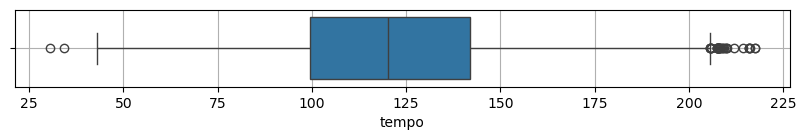

In [14]:
plt.figure(figsize=(10,1))
sns.boxplot(data=df, x=df["tempo"], orient="h")
plt.grid()

Lewy i prawy bok pudełka odpowiadają odpowiednio pierwszemu (25%) i trzeciemu (75%) kwartylowi, natomiast pionowa linia wewnątrz pudełka odpowiada medianie. Po obu stronach każdego pudełka są wąsy, które sięgają w lewo do wartości minimalnej, a w prawo do wartości maksymalnej, po obu stronach z wyłączeniem wartości odstających (outliers). Wartości odstające (outliers) zaznaczone są niewielkimi okręgami po ubu stronach.

Jak wspomniano powyżej, widoczne na powyższym wykresie wartości odstające zostały określone metodą rozstępu międzykwartylowego (interquartile range, IQR). Zakres wąsów na wykresie określony jest w następujący sposób:

- dolna granica = Q1 - 1,5 x IQR
- górna granica = Q3 + 1,5 x IQR

gdzie: 
- Q1 - dolny kwartyl (25%)
- Q3 - górny kwartyl (75%)
- IQR = Q3 - Q1
  
Wartości poza tymi granicami to wartości odstające (outliers).

W przypadku wartości odstających, mamy do wyboru jedno z trzech podejść:
- możemy te wartości po prostu zostawić
- możemy te wartości zastąpić innymi (np. średnią, medianą, granicą wyznaczoną przez kwartyle itp.)
- możemy usunąć wiersze zawierające te wartości

Zanim przejdziemy do analizy wartości odstających dla poszczególnych cech, napiszmy dwie funkcje, które uproszczą nam to zadanie:

- Pierwsza funkcja będzie wyświetlała najważniejsze informacje dotyczące wartości odstających, takie jak kwartyl dolny i górny, rozstęp międzykwartylowy, dolna i górna granica definiująca wartości odstające, liczba wartości odstających poniżej minimum, powyżej maksimum i łącznie. Funkcja będzie także umożliwiała (opcjonalnie) wyświetlenie posortowanych rekordów zawierających wartości odstające.
- Druga funkcja będzie usuwała wiersze z wartościami poza zadanym zakresem. Może to być zakres obejmujący wartości odstające, ale może to być także dowolny inaczej zdefiniowany zakres, gdyż nie zawsze będziemy chcieli usuwać wszystkie wiersze z wartościami odstającymi. Funkcja ta będzie dodatkowo wyświetlać informacje na temat wielkości zbioru przed usunięciem wierszy, liczby usuniętych wierszy oraz wielkości zbioru po usunięciu wierszy.

Definicja pierwszej z opisanych powyżej funkcji wygląda następująco:

In [15]:
def analiza_wartosci_odstajacych(kolumna, niskie=0, wysokie=0, razem=0):
    Q1 = df[kolumna].quantile(.25)
    Q3 = df[kolumna].quantile(.75)
    IQR = Q3 - Q1
    
    dolna_granica = Q1 - 1.5 * IQR
    gorna_granica = Q3 + 1.5 * IQR

    df_odstajace_niskie = df[df[kolumna] < dolna_granica]
    df_odstajace_wysokie = df[df[kolumna] > gorna_granica]
    df_odstajace_razem = pd.concat([df_odstajace_niskie, df_odstajace_wysokie])
    
    liczba_wartosci_odstajacych_niskich = len(df_odstajace_niskie)
    liczba_wartosci_odstajacych_wysokich = len(df_odstajace_wysokie)
    liczba_wartosci_odstajacych = len(df_odstajace_razem)

    zestawienie = f'''
kwartyl dolny: {Q1}
kwartyl górny: {Q3}
rozstęp międzykwartylowy: {IQR}
dolna granica: {dolna_granica}
górna granica: {gorna_granica}
liczba wartości odstających poniżej minimum: {liczba_wartosci_odstajacych_niskich}
liczba wartości odstających powyżej maksimum: {liczba_wartosci_odstajacych_wysokich}
liczba wartości odstających łącznie: {liczba_wartosci_odstajacych}
'''
    
    print(zestawienie)
    
    if niskie > 0:
        print(f'Wartości odstające poniżej minimum (liczba rekordów: {niskie}):\n')
        print(df_odstajace_niskie.sort_values(by=kolumna).head(niskie))

    if wysokie > 0:
        print(f'Wartości odstające powyżej maksimum (liczba rekordów: {wysokie}):\n')
        print(df_odstajace_wysokie.sort_values(by=kolumna).head(wysokie))

    if razem > 0:
        print(f'Wartości odstające (liczba rekordów: {razem}):\n')
        print(df_odstajace_razem.sort_values(by=kolumna).head(razem))

Definicja drugiej funkcji wygląda tak:

In [16]:
def usun_rekordy_spoza_zakresu(df, kolumna, zakres_dolny, zakres_gorny):
    rekordy_przed = len(df)
    df = df[(df[kolumna] >= zakres_dolny) & (df[kolumna] <= zakres_gorny)]
    rekordy_po = len(df)
    print(f'Liczba rekordów przed usunięciem wartości spoza podanego zakresu: {rekordy_przed}')
    print(f'Liczba usuniętych rekordów: {rekordy_przed - rekordy_po}')
    print(f'Liczba pozostałych rekordów: {rekordy_po}')
    return df

Teraz możemy rozpocząć analizę wartości odstających dla poszczególnych cech.

##### popularność

Wykres pudełkowy dla cechy popularność przedstawia się następująco:

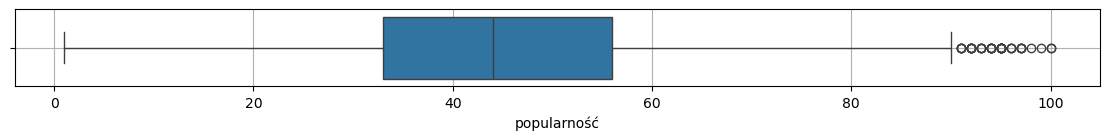

In [17]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["popularność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

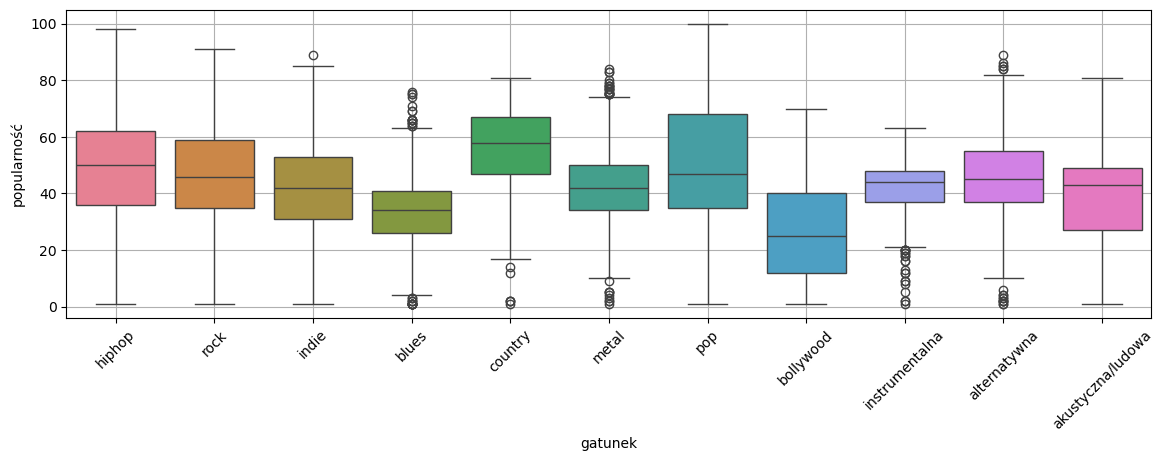

In [18]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["popularność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Jak widać na powyższym wykresie, mamy tu wartości odstające (outliers) poniżej wartości minimalnej dla takich gatunków jak blues, country, metal, instrumentalna i alternatywna. Mamy także wartości odstające powyżej wartości maksymalnej dla takich gatunków jak indie, blues, metal i alternatywna. Musimy zdecydować, czy pozostawimy je w zbiorze, zastąpimy innymi wartościami, czy usuniemy. W tym przypadku wartości odstające nie wykraczają znacznie poza wartości skrajne, dlatego dla cechy popularność, wartości odstających nie będziemy usuwać.

##### taneczność

Wykres pudełkowy dla cechy taneczność przedstawia się następująco:

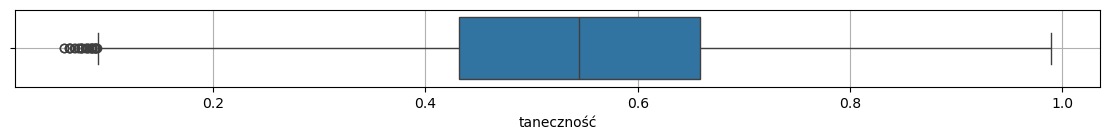

In [19]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["taneczność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

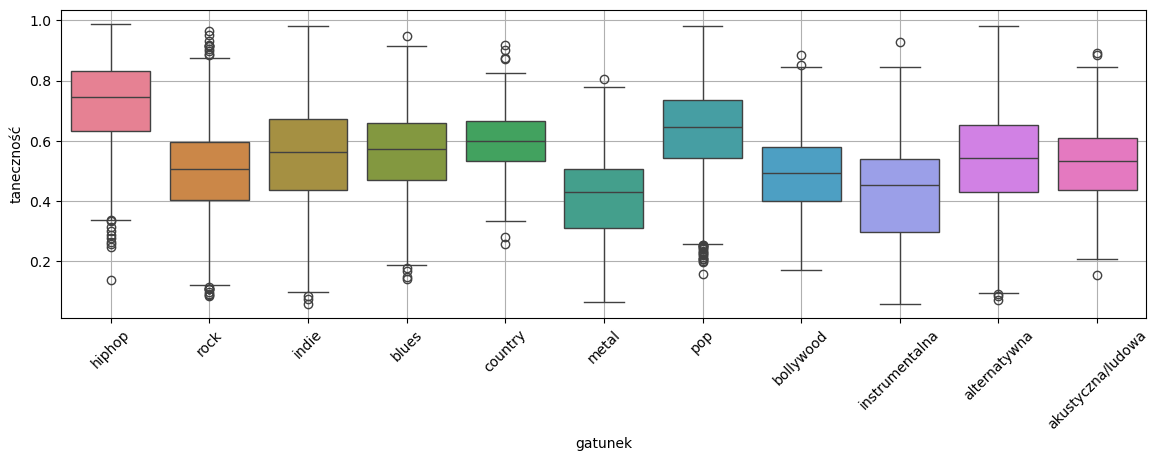

In [20]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["taneczność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Podobnie jak w przypadku cechy popularność, mamy tu wartości odstające nieodbiegające znacznie od wartości minimalnych i maksymalnych, dlatego zachowamy je w obecnej postaci.

##### energia

Wykres pudełkowy dla cechy energia przedstawia się następująco:

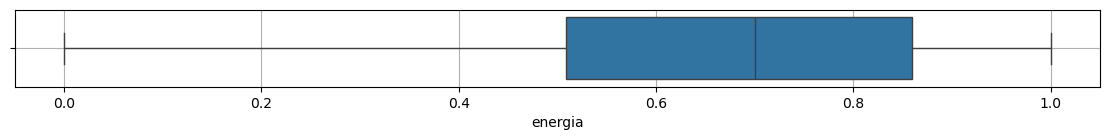

In [21]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["energia"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

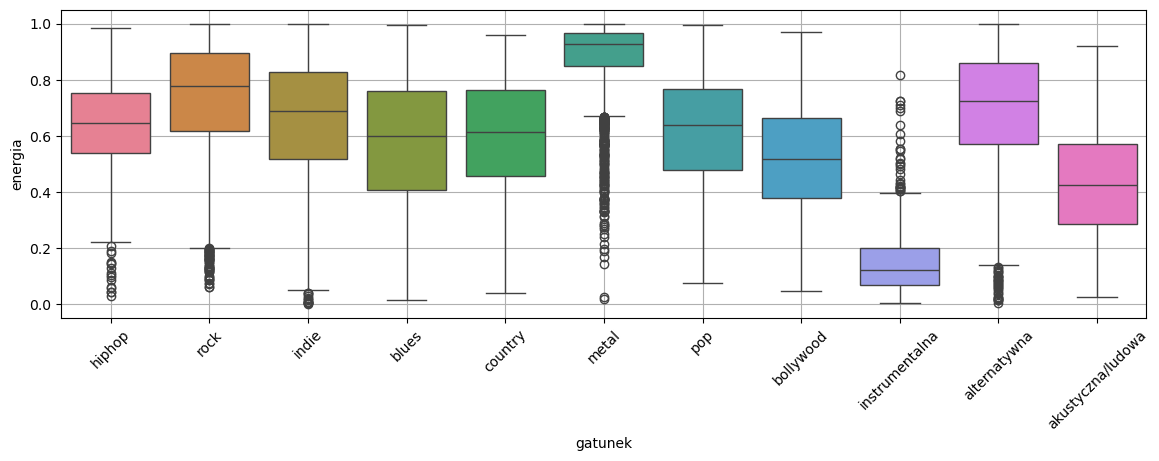

In [22]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["energia"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Jak widać na powyższym wykresie, nie ma tu wartości odstających w ujęciu sumarycznym, natomiast są dla poszczególnych gatunków. Z wyjątkiem muzyki instrumentalnej, wszystkie wartości odstające znajdują się poniżej wartości minimalnej. Najbardziej od wartości minimalnej odbiegają one w przypadku metalu. Biorąc pod uwagę brak wartości odstających dla cechy w ujęciu ogólnym, nie będziemy zmieniać tych wartości, ani usuwać wierszy, w których one wystepują.

##### tonacja

Wykres pudełkowy dla cechy tonacja przedstawia się następująco:

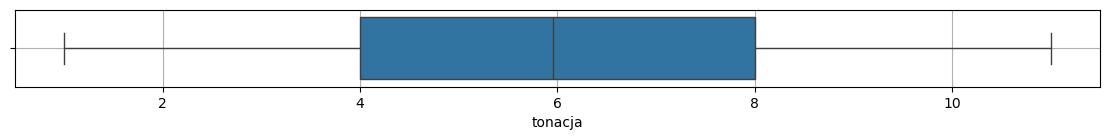

In [23]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["tonacja"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

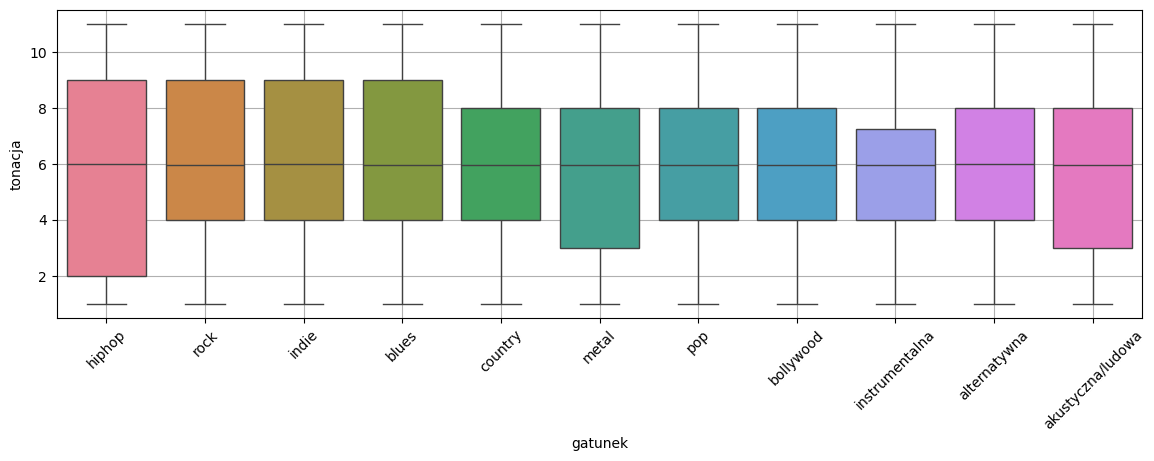

In [24]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["tonacja"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Dla cechy tonacja nie ma wartości odstających ani w ujęciu sumarycznym, ani w rozbiciu na poszczególne gatunki muzyczne.

##### głośność

Wykres pudełkowy dla cechy głośność przedstawia się następująco:

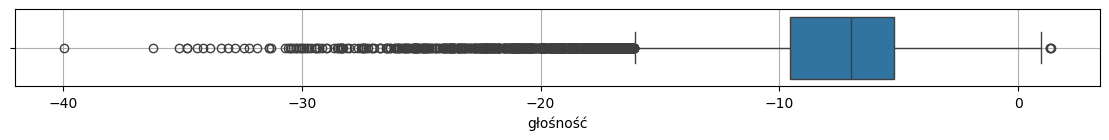

In [25]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["głośność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

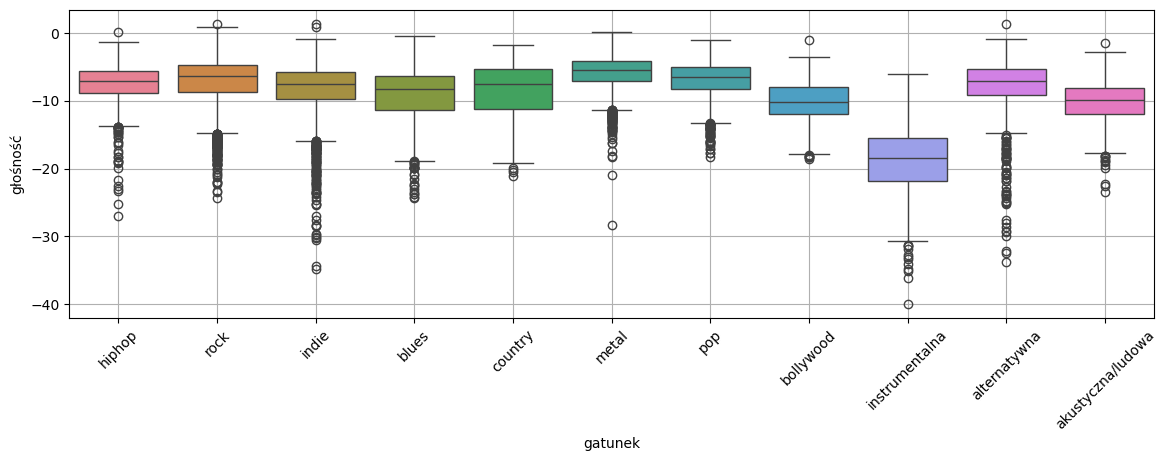

In [26]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["głośność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

W przypadku cechy głośność mamy bardzo dużo wartości odstających, z czego zdecydowana większość znajduje się poniżej wartości minimalnej. Przyglądając się wartościom tej cechy możemy zauważyć, że większość z nich jest ujemna. Wartości ujemne w decybelach stosowane są często w trakcie przetwarzania dźwięku cyfrowego i wyrażone są one w stosunku do przyjętego najwyższego możliwego poziomu. 

Wykorzystajmy zdefiniowaną powyżej funkcję do przeprowadzenia analizy tych wartości:

In [27]:
analiza_wartosci_odstajacych('głośność', niskie=5, wysokie=5, razem=0)


kwartyl dolny: -9.538499999999999
kwartyl górny: -5.187
rozstęp międzykwartylowy: 4.351499999999999
dolna granica: -16.065749999999998
górna granica: 1.3402499999999984
liczba wartości odstających poniżej minimum: 814
liczba wartości odstających powyżej maksimum: 3
liczba wartości odstających łącznie: 817

Wartości odstające poniżej minimum (liczba rekordów: 5):

       popularność  taneczność  energia    tonacja  głośność  tonalność  \
11102    44.512124      0.0596  0.00121   2.000000   -39.952          1   
1182     41.000000      0.3850  0.00573  11.000000   -36.214          1   
5777     49.000000      0.0882  0.00626  10.000000   -35.154          1   
9331     52.000000      0.3060  0.16400  10.000000   -34.825          1   
3247     21.000000      0.0993  0.01540   5.952447   -34.797          1   

       ilość_mowy  akustyczność  instrumentalność  na_żywo  ton_emocjonalny  \
11102      0.0559         0.987             0.262   0.0991           0.0383   
1182       0.0365       

Wartości odstające powyżej maksimum są nieliczne i nie odbiegają znacząco od maksimum, więc zostawimy je w zbiorze w obecnej postaci. Wartości odstających poniżej minimum jest znacznie więcej i niektóre z nich na wykresie sumarycznym odbiegają mocno od minimum. Kiedy przyjrzymy się jednak wykresowi w rozbiciu na poszczególne gatunki muzyczne, zauważymy, że wartości te nie odbiegają już tak znacząco od wartości minimalnych. Dlatego także te wartości zachowamy niezmienione.

##### tonalność

Wykres pudełkowy dla cechy tonalność przedstawia się następująco:

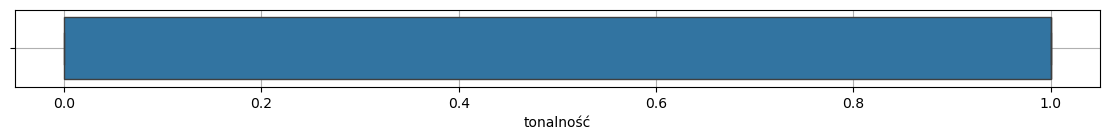

In [28]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["tonalność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

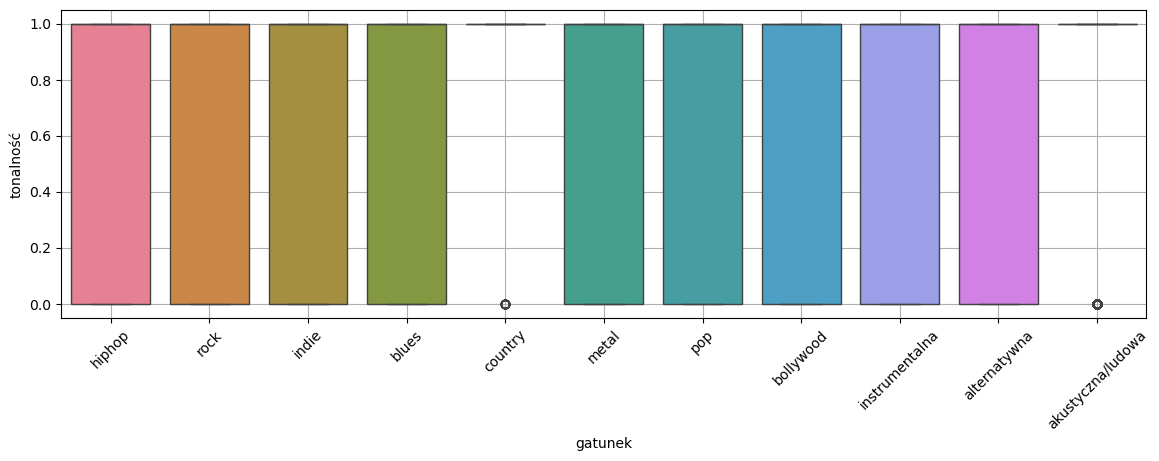

In [29]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["tonalność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Dla cechy tonaloność nie ma wartości odstających w ujeciu sumarycznym, natomiast w rozbiciu na poszczególne gatunki wartości odstające zauważamy jedynie w przypadku country i muzyki akustycznej/ludowej.

##### ilość_mowy

Wykres pudełkowy dla cechy ilość_mowy przedstawia się następująco:

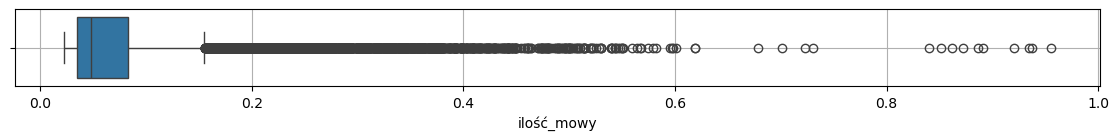

In [30]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["ilość_mowy"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

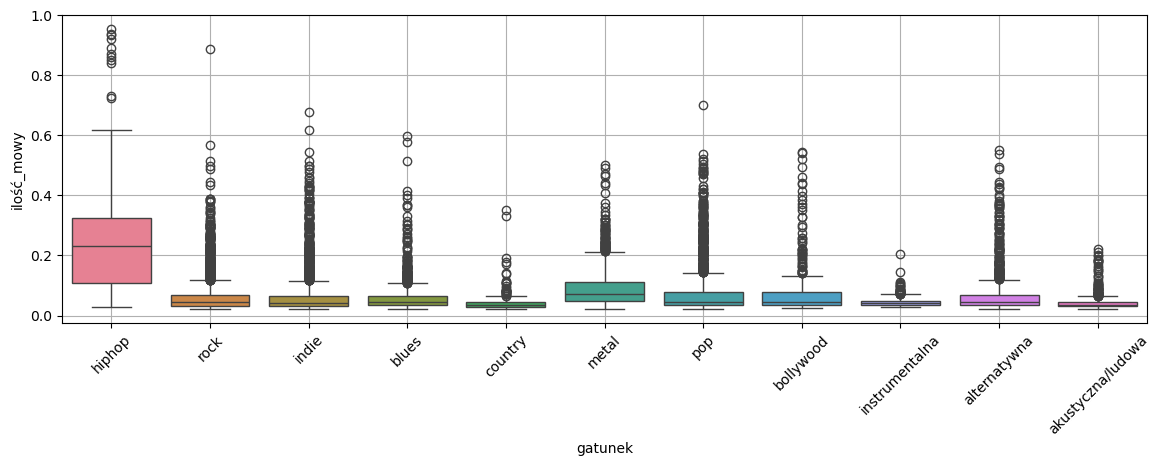

In [31]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["ilość_mowy"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Jak widać na powyższym wykresie, mamy tu bardzo dużo wartości odstających. Wszystkie te wartości są wyższe od wartości maksymalnych. W rozbiciu na poszczególne gatunki widzimy jednak, że dla każdego gatunku wartości odstające znajdują się stosunkowo blisko wartości maksymalnej. Przeprowadźmy analizę wartości odstających:

In [32]:
analiza_wartosci_odstajacych('ilość_mowy', niskie=5, wysokie=5, razem=0)


kwartyl dolny: 0.0348
kwartyl górny: 0.08305
rozstęp międzykwartylowy: 0.04825
dolna granica: -0.037575
górna granica: 0.15542499999999998
liczba wartości odstających poniżej minimum: 0
liczba wartości odstających powyżej maksimum: 2032
liczba wartości odstających łącznie: 2032

Wartości odstające poniżej minimum (liczba rekordów: 5):

Empty DataFrame
Columns: [popularność, taneczność, energia, tonacja, głośność, tonalność, ilość_mowy, akustyczność, instrumentalność, na_żywo, ton_emocjonalny, tempo, długość, metrum, gatunek]
Index: []
Wartości odstające powyżej maksimum (liczba rekordów: 5):

       popularność  taneczność  energia  tonacja  głośność  tonalność  \
6581          18.0       0.529   0.0609      7.0   -23.480          1   
3660          73.0       0.932   0.8350      1.0    -3.905          1   
14809         27.0       0.743   0.4670      1.0    -9.363          1   
9942          44.0       0.503   0.9430      1.0    -7.368          1   
13161         47.0       0.780   0

Wartości odstających jest ponad 2 tysiące. Usunięcie tylu wierszu mogłoby nas pozbawić wielu innych cennych informacji w nich zawartych. Poza tym nie mamy wartości odstających leżących bardzo daleko od górnej granicy. W związku z tym wszystkie wartości odstające pozostawimy. 

##### akustyczność

Wykres pudełkowy dla cechy akustyczność przedstawia się następująco:

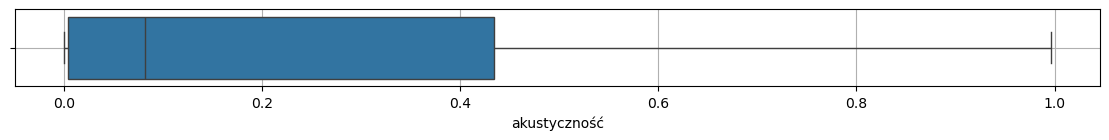

In [33]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["akustyczność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

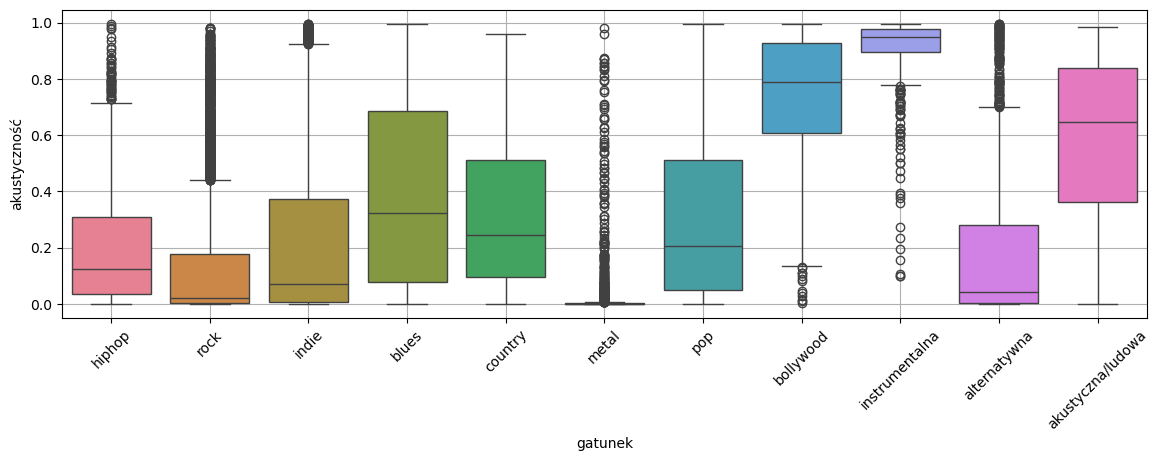

In [34]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["akustyczność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Dla poszczególnych gatunków mamy liczne wartości odstające, ale w ujęciu sumarycznym wartości takie nie występują. W związku z tym, wszystkie te wartości zostaną zachowane.

##### instrumentalność

Wykres pudełkowy dla cechy instrumentalność przedstawia się następująco:

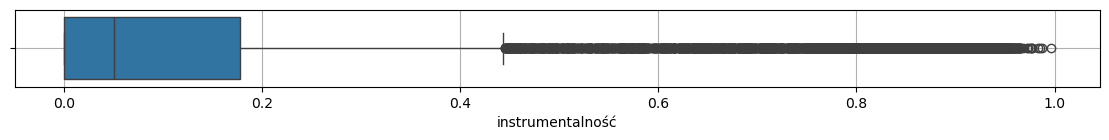

In [35]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["instrumentalność"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

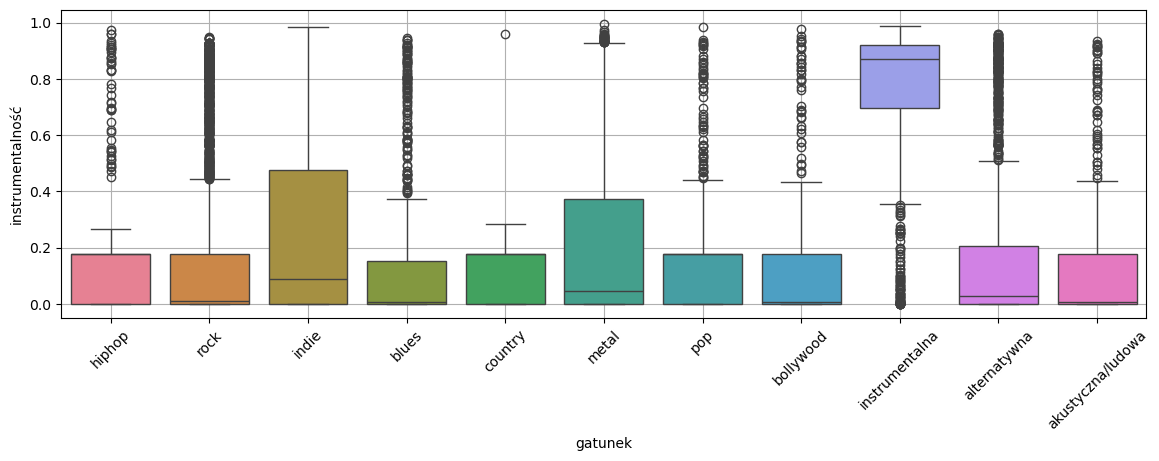

In [36]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["instrumentalność"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

W przypadku tej cechy mamy sytuację podobną jak w przypadku ilość_mowy. Przeprowadźmy analizę wartości odstających:

In [37]:
analiza_wartosci_odstajacych('instrumentalność', niskie=5, wysokie=5, razem=0)


kwartyl dolny: 0.000294
kwartyl górny: 0.1775619253660327
rozstęp międzykwartylowy: 0.17726792536603272
dolna granica: -0.26560788804904906
górna granica: 0.4434638134150818
liczba wartości odstających poniżej minimum: 0
liczba wartości odstających powyżej maksimum: 2588
liczba wartości odstających łącznie: 2588

Wartości odstające poniżej minimum (liczba rekordów: 5):

Empty DataFrame
Columns: [popularność, taneczność, energia, tonacja, głośność, tonalność, ilość_mowy, akustyczność, instrumentalność, na_żywo, ton_emocjonalny, tempo, długość, metrum, gatunek]
Index: []
Wartości odstające powyżej maksimum (liczba rekordów: 5):

      popularność  taneczność  energia  tonacja  głośność  tonalność  \
4241         34.0       0.287    0.770      2.0    -7.477          1   
8810         19.0       0.345    0.638      4.0    -9.083          0   
1407         40.0       0.663    0.960      1.0    -4.927          1   
458          34.0       0.287    0.770      2.0    -7.477          1   
2456

Tutaj także jest bardzo dużo wartości odstających, z czego wszystkie są powyżej wartości maksymalnej. Znajdują się one jednak stosunkowo blisko górnej granicy i zostaną zachowane.

##### na_żywo

Wykres pudełkowy dla cechy na_żywo przedstawia się następująco:

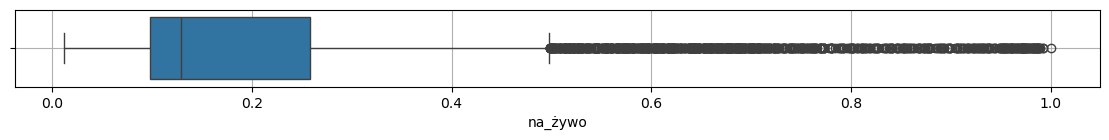

In [38]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["na_żywo"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

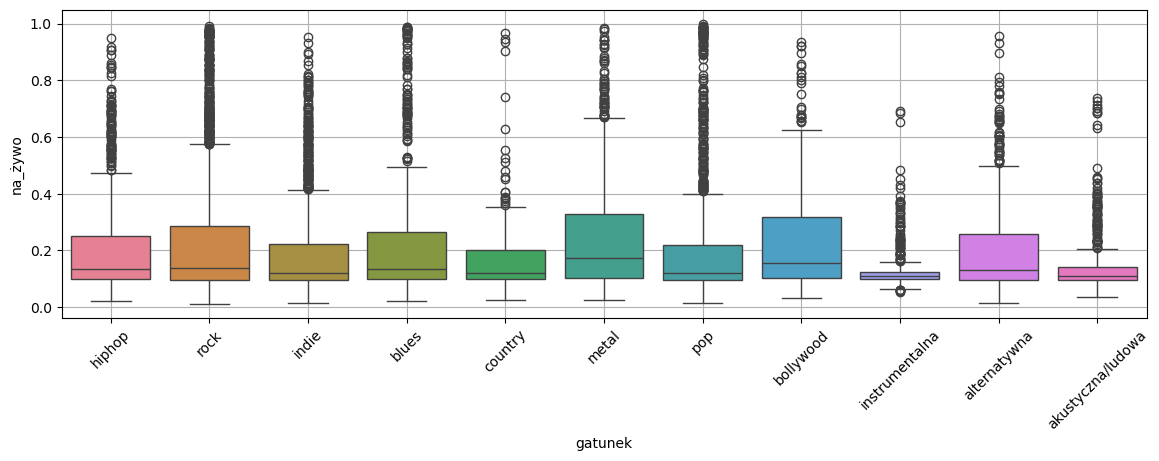

In [39]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["na_żywo"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Również tutaj mamy podobną sytuację jak przy poprzedniej cesze, w związku z czym nie będziemy usuwać wierszy z wartościami odstającymi.

##### ton_emocjonalny

Wykres pudełkowy dla cechy ton_emocjonalny przedstawia się następująco:

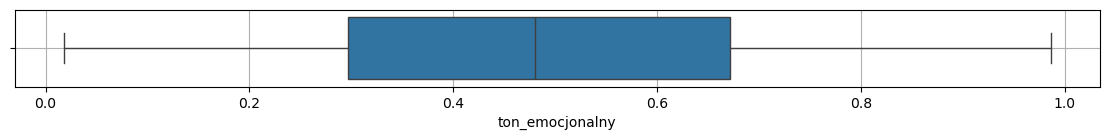

In [40]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["ton_emocjonalny"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

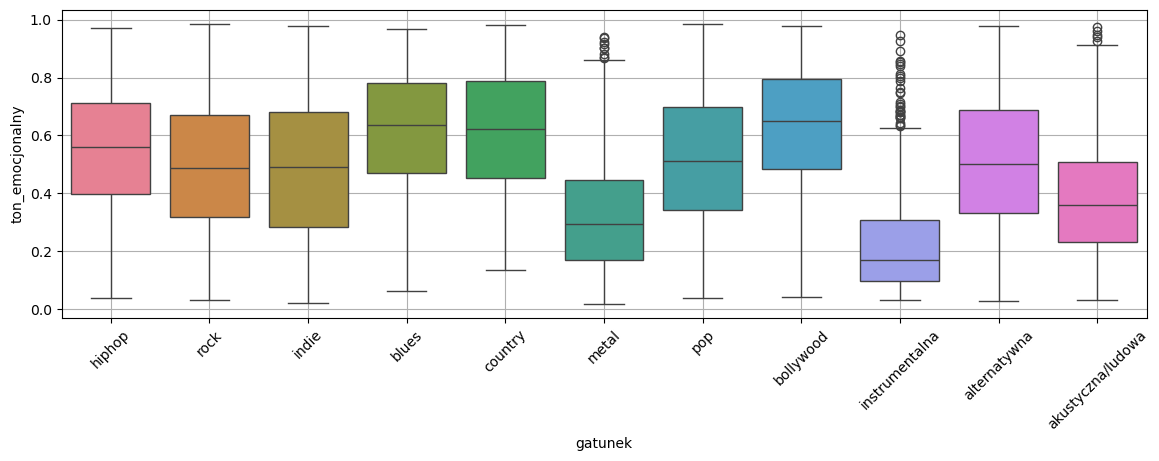

In [41]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["ton_emocjonalny"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Jak widać na powyższym wykresie, mamy tu stosunkowo nieliczne wartości odstające powyżej wartości maksymalnej w rozbiciu na gatunki. Nie są one widoczne w ujęciu sumarycznym. Wartości te zostaną zachowane. 

##### tempo

Wykres pudełkowy dla cechy tempo przedstawia się następująco:

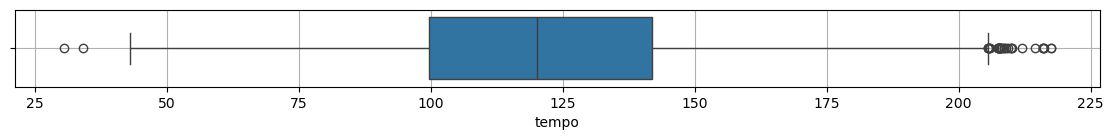

In [42]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["tempo"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

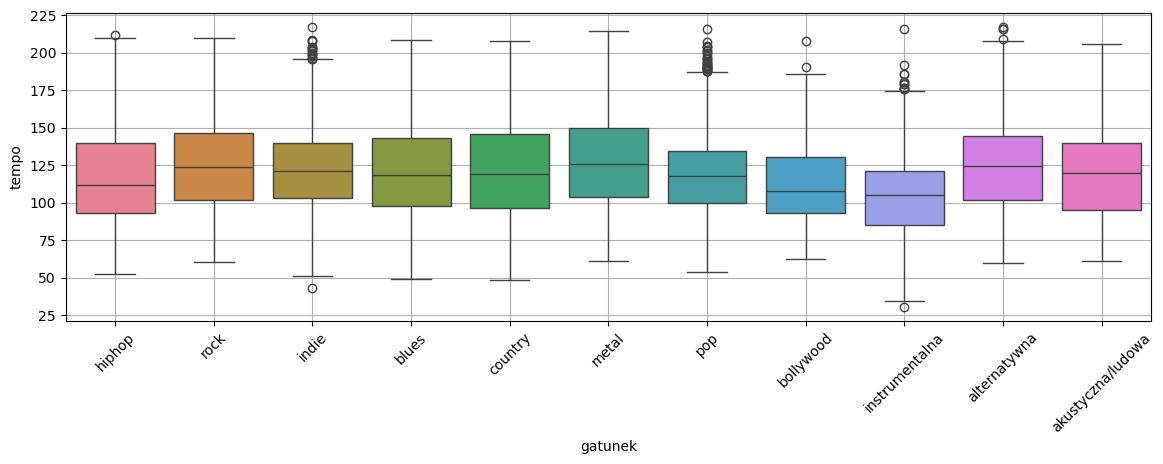

In [43]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["tempo"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

W przypadku tempa liczba wartości odstających jest niewielka, poza tym nie leżą one daleko od dolnej i górnej granicy.

##### długość

W przypadku tej cechy mamy wartości wyrażone w minutach lub w milisekundach, stąd bardzo duże różnice pomiędzy wartościami minimalną i maksymalną:

In [44]:
df['długość'].describe()

count    1.795500e+04
mean     2.005207e+05
std      1.114491e+05
min      5.016500e-01
25%      1.662280e+05
50%      2.091070e+05
75%      2.524080e+05
max      1.477187e+06
Name: długość, dtype: float64

Wartość minimalna to 0,50165. Wartość maksymalna to 1477187. Można założyć, że wartość minimalna podana jest w minutach, wartość maksymalna w milisekundach. Aby wartości były porównywalne, muszą być wyrażone w tej samej jednostce. Najczęściej długość utworu muzycznego podawana jest w minutach i sekundach, ale raczej nie w milisekundach. Moglibyśmy przyjąć sekundę jako wspólną jednostkę. Wyrażona w ten sposób długość utworu będzie intuicyjna. Możemy też wyrazić długość utworu w minutach, wtedy nie musielibyśmy przeliczać wszystkich wartości, a tylko te, które są wyrażone w milisekundach. Właśnie to drugie rozwiązanie przyjmiemy.

1 minuta składa się z 60 sekund, czyli 60 000 milisekund. Aby zamienić milisekundy na minuty, wystarczy podzielić ich liczbę przez 60 000. Sprawdźmy, ile wynosi w minutach długość najdłuższego utworu:

In [45]:
1477187 / 60000

24.619783333333334

Najdłuższy utwór, którego długość wyrażona jest w milisekundach trwa po przeliczeniu ok. 24,62 min. Sprawdźmy ile trwa najdłuższy utwór wyrażony w minutach i czy jest dłuższy niż 24,62 min. Możemy założyć, że żaden utwór nie trwa dłużej niż 1000 min. Wypiszmy wszystkie utwory o długości pomiędzy 24,62 a 1000: 

In [46]:
df[(df['długość'] > 24.62) & (df['długość'] < 1000)]['długość']

1219     29.450
14934    29.886
Name: długość, dtype: float64

Jak widać, są 2 utwory, których długość jest większa niż 24,62 min, z czego najdłuższy utwór trwa 29,886 min, w zaokrągleniu 30 min. Dlatego wszystkie wartości wyższe od tej liczby podane są w milisekundach i zamienimy je na minuty:

In [47]:
df['długość'] = df['długość'].apply(lambda x: x/60000 if x > 30 else x)

Sprawdźmy ponownie statystyki dla tej cechy:

In [48]:
df['długość'].describe()

count    17955.000000
mean         3.927994
std          1.416233
min          0.388667
25%          3.127317
50%          3.666633
75%          4.384158
max         29.886000
Name: długość, dtype: float64

Teraz wszystkie długości wyrażone są w tej samej jednostce i możemy je porównywać.

Wykres pudełkowy dla cechy długość przedstawia się następująco:

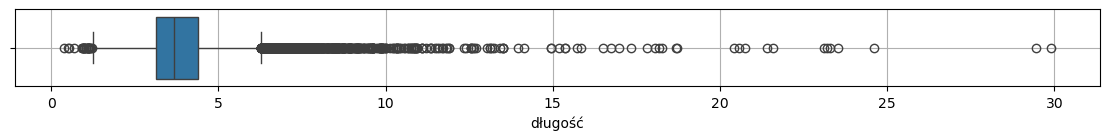

In [49]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["długość"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

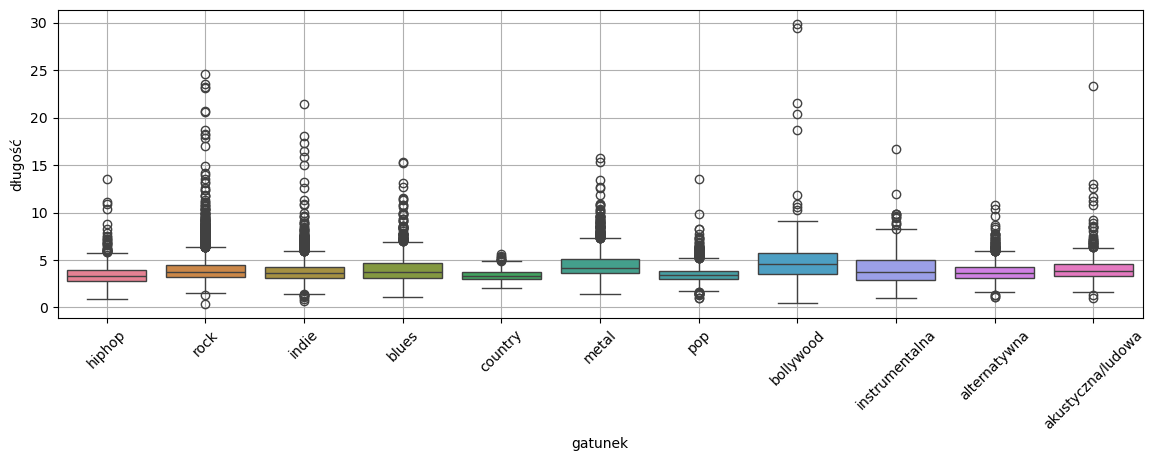

In [50]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["długość"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Mamy tu dość dużo wartości odstających, z czego niektóre leżą znacznie powyżej wartości maksymalnych. Przeprowadźmy analizę tych wartości:

In [51]:
analiza_wartosci_odstajacych('długość', niskie=5, wysokie=5, razem=0)


kwartyl dolny: 3.1273166665
kwartyl górny: 4.384158333333334
rozstęp międzykwartylowy: 1.2568416668333335
dolna granica: 1.2420541662499998
górna granica: 6.269420833583334
liczba wartości odstających poniżej minimum: 26
liczba wartości odstających powyżej maksimum: 890
liczba wartości odstających łącznie: 916

Wartości odstające poniżej minimum (liczba rekordów: 5):

       popularność  taneczność  energia   tonacja  głośność  tonalność  \
11544    44.512124       0.302    0.211  5.952447   -19.351          1   
4619      1.000000       0.585    0.493  2.000000   -15.246          1   
1492      1.000000       0.597    0.310  2.000000   -12.812          1   
13913    27.000000       0.315    0.120  9.000000   -15.267          0   
12376    38.000000       0.582    0.846  8.000000    -5.053          0   

       ilość_mowy  akustyczność  instrumentalność  na_żywo  ton_emocjonalny  \
11544      0.1050         0.165          0.000007   0.1970            0.398   
4619       0.5430        

Liczba wartości odstających niskich jest znikoma, poza tym wartości te nie odstają znacząco. Znacznie więcej jest wartości odstających wysokich. Duża część z nich także nie odstaje znacząco, ale pewna ich liczba wyraźnie odbiega od typowych wartości. Patrząc na wykres sumaryczny możemy przyjąć, że wartości powyżej 14 min mają charakter incydentalny. Sprawdźmy ile ich jest w naszym zbiorze:

In [52]:
len(df[df['długość'] > 14])

30

W związku z tym, że jest to niewielka liczba, możemy spokojnie usunąć wiersze, w których się one znajdują:

In [53]:
df = usun_rekordy_spoza_zakresu(df, 'długość', 0, 14)

Liczba rekordów przed usunięciem wartości spoza podanego zakresu: 17955
Liczba usuniętych rekordów: 30
Liczba pozostałych rekordów: 17925


##### metrum

Wykres pudełkowy dla cechy metrum przedstawia się następująco:

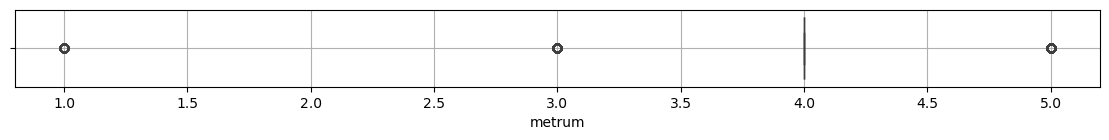

In [54]:
plt.figure(figsize=(14, 1))
sns.boxplot(data=df, x=df["metrum"], orient="h")
plt.grid()

W rozbiciu na poszczególne wartości cechy docelowej (gatunek) wygląda to tak:

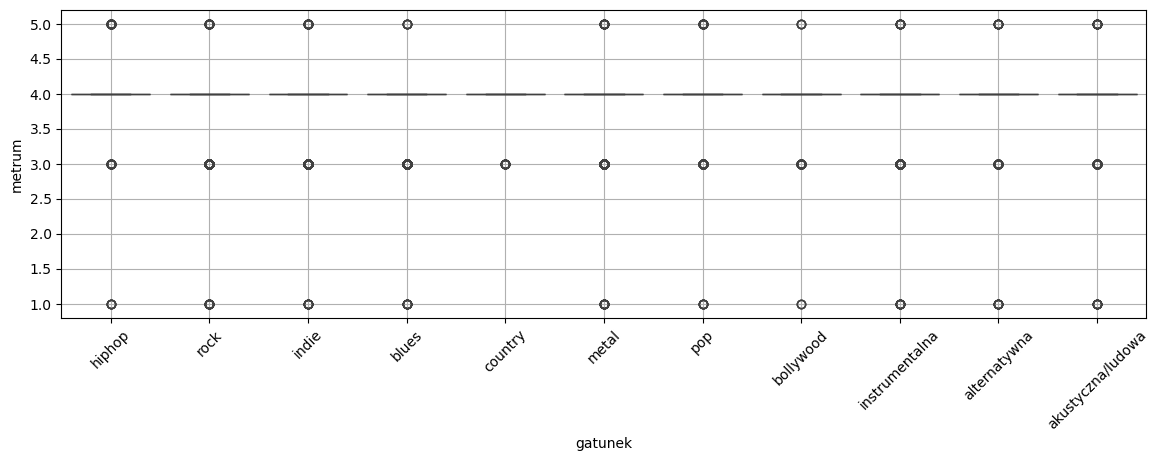

In [55]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df, x=df["gatunek"], y=df["metrum"], hue="gatunek")
plt.xticks(rotation=45)
plt.grid()

Wygląda na to, że zdecydowana większość utworów napisana jest w metrum 4,0. Jednak wartości odstające przyjmują różne wartości na skali od 1 do 5. Przeprowadźmy ich analizę:

In [56]:
analiza_wartosci_odstajacych('metrum', niskie=5, wysokie=5, razem=0)


kwartyl dolny: 4.0
kwartyl górny: 4.0
rozstęp międzykwartylowy: 0.0
dolna granica: 4.0
górna granica: 4.0
liczba wartości odstających poniżej minimum: 1331
liczba wartości odstających powyżej maksimum: 201
liczba wartości odstających łącznie: 1532

Wartości odstające poniżej minimum (liczba rekordów: 5):

       popularność  taneczność  energia  tonacja  głośność  tonalność  \
8887          61.0       0.529    0.491      1.0    -6.249          0   
7489          33.0       0.729    0.617      3.0    -9.044          0   
3702           6.0       0.309    0.258      8.0   -12.180          0   
14143          2.0       0.450    0.467      3.0   -10.927          1   
10185         43.0       0.302    0.907      9.0    -4.644          0   

       ilość_mowy  akustyczność  instrumentalność  na_żywo  ton_emocjonalny  \
8887       0.1930      0.154000          0.100000    0.136           0.5400   
7489       0.0483      0.125000          0.001380    0.115           0.6930   
3702       0.045

Wartości odstające są stosunkowo liczne, więc zachowamy je, tym bardziej, że wszystkie mieszczą się w określonym przedziale.

Przyjrzyjmy się statystykom naszego zbioru po usunięciu części wartości odstających:

In [57]:
df.describe()

,popularność,taneczność,energia,tonacja,głośność,tonalność,ilość_mowy,akustyczność,instrumentalność,na_żywo,ton_emocjonalny,tempo,długość,metrum
count,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000
mean,44.512368,0.543829,0.662929,5.952441,-7.904624,0.636764,0.079701,0.246795,0.177319,0.195919,0.486334,122.644432,3.902174,3.924240
std,17.201063,0.166108,0.235367,3.012721,4.049708,0.480945,0.083538,0.310536,0.264265,0.158820,0.240171,29.557874,1.258081,0.361405
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,0.388667,1.000000
25%,33.000000,0.432000,0.510000,4.000000,-9.532000,0.000000,0.034800,0.004290,0.000292,0.097500,0.297000,99.693000,3.126667,4.000000
50%,44.000000,0.546000,0.700000,5.952447,-7.009000,1.000000,0.047400,0.081200,0.049500,0.129000,0.481000,120.066000,3.664500,4.000000
75%,56.000000,0.660000,0.860000,8.000000,-5.184000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.975000,4.378217,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,13.969283,5.000000


W tej chwili wartości dla poszczególnych cech są bardziej realne niż przed usunięciem niektórych rekordów zawierających wartości odstające oraz zamianą części tych wartości na inne.

#### Korelacje między cechami

Zanim przejdziemy do szczegółowej analizy poszczególnych cech, przyjrzyjmy się temu, w jaki sposób cechy te są ze sobą powiązane. Przede wszystkim zwróćmy uwagę na korelacje z cechą gatunek, która jest cechą docelową:

W związku z tym, że cecha decelowa (gatunek) nie jest cechą numeryczną, nie możemy użyć funkcji corr. W przypadku, gdy cecha docelowa jest kategoryczna, a pozostałe cechy są numeryczne, możemy użyć jednego z poniższych rozwiązań:
- Współczynnik korelacji η² (Correlation Ratio) - mierzy on proporcję wariancji w zmiennej numerycznej, którą można wyjaśnić zmienną kategoryczną
- Test F ANOVA - mierzy on relację między zmiennymi numerycznymi a zmienną kategoryczną, obliczając statystykę F i wartość p dla każdej cechy
- Informacja wzajemna (Mutual Information) - mierzy zależność między zmiennymi zarówno kategorycznymi, jak i numerycznymi

W naszej analizie wykorzystamy ostatnią z przedstawionych opcji. Informację wzajemną można obliczyć, korzystając z biblioteki sklearn. Zaimportujmy potrzebną funkcję:

In [58]:
from sklearn.feature_selection import mutual_info_classif

Teraz przypiszmy zbiór obejmujący cechy numeryczne do zmiennej X, a cechę docelową do y: 

In [59]:
X = df[[
    'popularność', 
    'taneczność', 
    'energia', 
    'tonacja', 
    'głośność', 
    'tonalność', 
    'ilość_mowy', 
    'akustyczność', 
    'instrumentalność', 
    'na_żywo', 
    'ton_emocjonalny', 
    'tempo', 
    'długość', 
    'metrum'
]]

y = df['gatunek']

Obliczmy informację wzajemną:

In [60]:
informacja_wzajemna = mutual_info_classif(X, y)

Utwórzmy DataFrame z wynikami i wyświetlmy je:

In [61]:
informacja_wzajemna_wyniki = pd.DataFrame({
    'Cecha': X.columns,
    'Informacja wzajemna': informacja_wzajemna
})

In [62]:
print(informacja_wzajemna_wyniki.sort_values(by='Informacja wzajemna', ascending=False))

               Cecha  Informacja wzajemna
7       akustyczność             0.271622
2            energia             0.213973
8   instrumentalność             0.167405
1         taneczność             0.166002
6         ilość_mowy             0.143857
4           głośność             0.129326
0        popularność             0.102274
10   ton_emocjonalny             0.090196
11             tempo             0.070032
12           długość             0.042395
9            na_żywo             0.027537
3            tonacja             0.026114
13            metrum             0.019843
5          tonalność             0.012678


Wyniki te interpretujemy w następujący sposób:
- 0 oznacza brak zależności między daną cechą a cechą docelową
- czym wyższa wartość, tym większa korelacja pomiędzy daną cechą a cechą docelową (brak górnej granicy)
- niskie wartości oznaczają słabą korelację między daną cechą, a cechą docelową

Cechą najsilniej skorelowaną z cechą docelową jest akustyczność, najsłabiej - tonalność. Cechy, których informacja wzajemna jest niższa niż 0,06 są najsłabiej skorelowane z cechą docelową, dlatego je usuniemy.

In [63]:
df = df.drop(['długość', 'na_żywo', 'metrum', 'tonacja', 'tonalność'], axis=1)

In [64]:
df.head()

,popularność,taneczność,energia,głośność,ilość_mowy,akustyczność,instrumentalność,ton_emocjonalny,tempo,gatunek
0,60.0,0.854,0.564,-4.964,0.0485,0.017100,0.177562,0.8990,134.071,hiphop
1,54.0,0.382,0.814,-7.230,0.0406,0.001100,0.004010,0.5690,116.454,rock
2,35.0,0.434,0.614,-8.334,0.0525,0.486000,0.000196,0.7870,147.681,indie
3,66.0,0.853,0.597,-6.528,0.0555,0.021200,0.177562,0.5690,107.033,hiphop
4,53.0,0.167,0.975,-4.279,0.2160,0.000169,0.016100,0.0918,199.060,rock


### Analiza ilościowa cech

Teraz możemy dokonać analizy cech. Na początek zbadajmy cechy ilościowe w sposób sumaryczny, tworząc odpowiednie histogramy dla wszystkich cech:

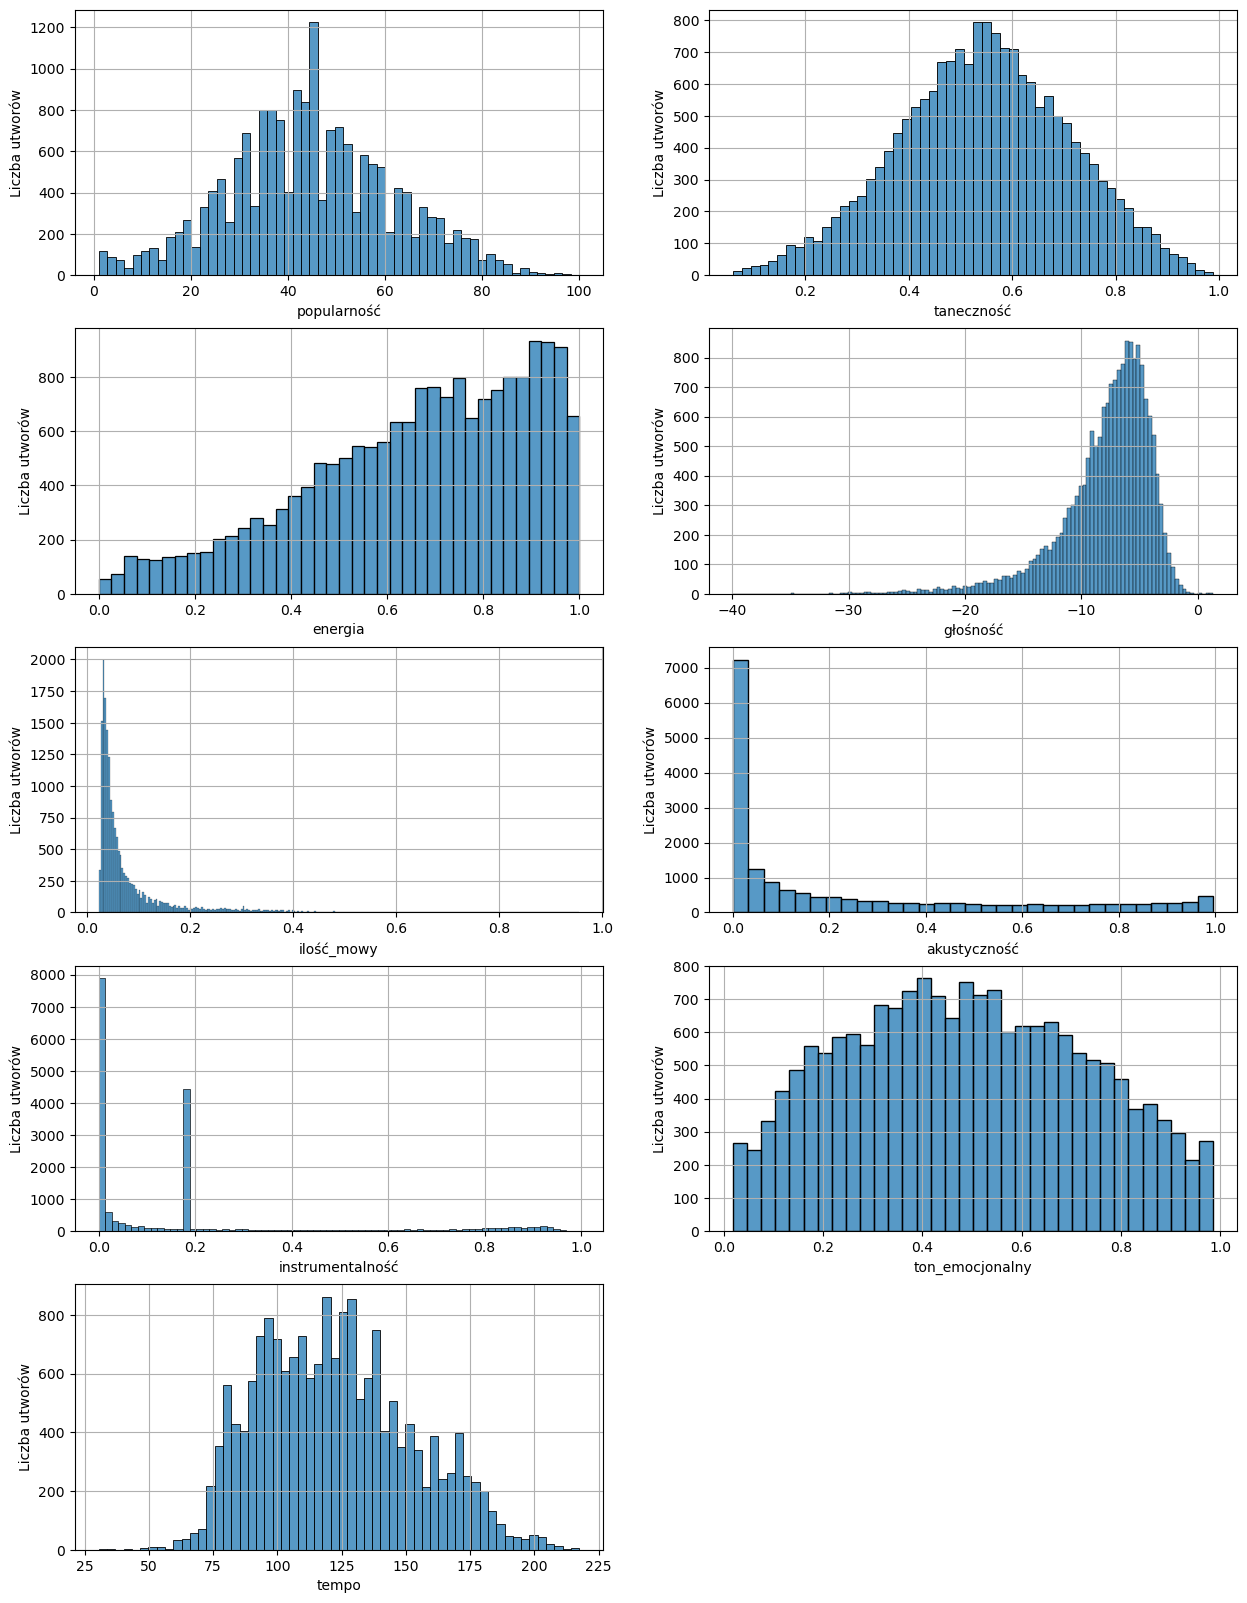

In [65]:
plt.figure(figsize = (15, 20))

for i in range(len(df.columns) - 1):
    plt.subplot(5, 2, i+1)
    sns.histplot(df.iloc[:, i]).set(ylabel='Liczba utworów')
    plt.grid()

Histogram dla cechy docelowej przedstawia się następująco:

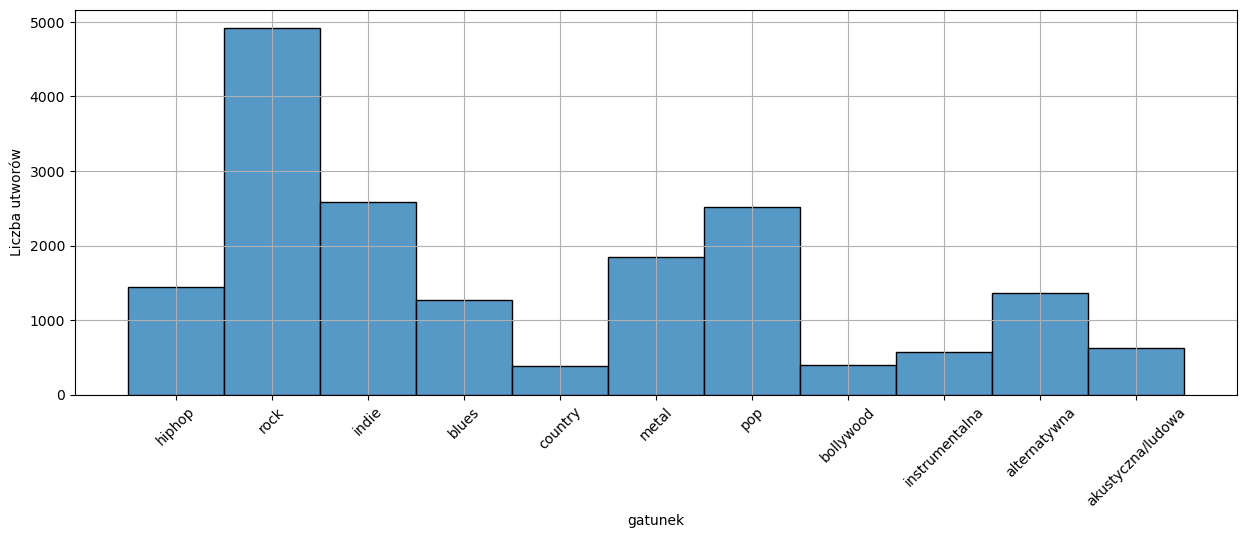

In [66]:
plt.figure(figsize = (15, 5))
sns.histplot(df['gatunek']).set(ylabel='Liczba utworów')
plt.xticks(rotation=45)
plt.grid()

Przyjrzyjmy się teraz wszystkim cechom przyjętym do analizy po kolei.

##### popularność

Zacznijmy od dystrybucji tej cechy:

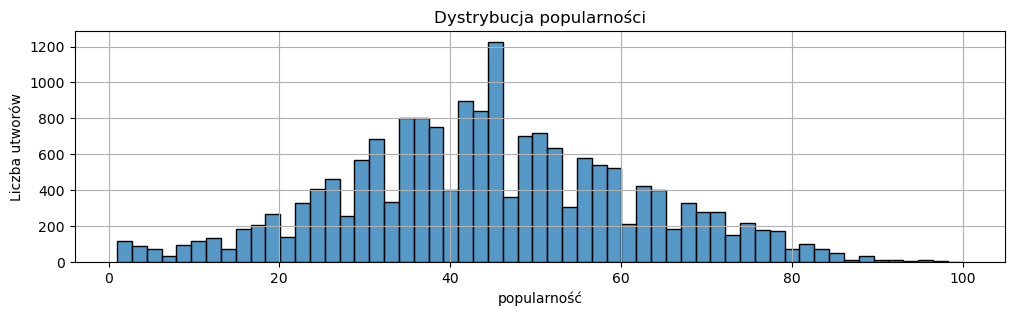

In [67]:
plt.figure(figsize=(12, 3))
sns.histplot(df["popularność"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja popularności")
plt.grid()

Jak widać, utworów średnio popularnych jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami popularność i gatunek:

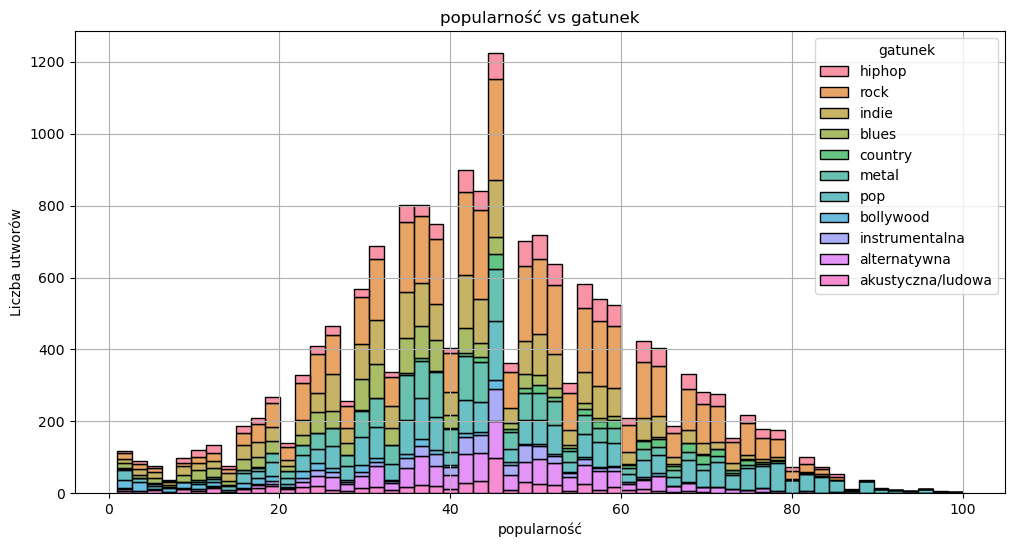

In [68]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["popularność"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("popularność vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary popularność - gatunek wynosi 0.103273 i jest jedna z niższych wartości. 

##### taneczność

Zacznijmy od dystrybucji tej cechy:

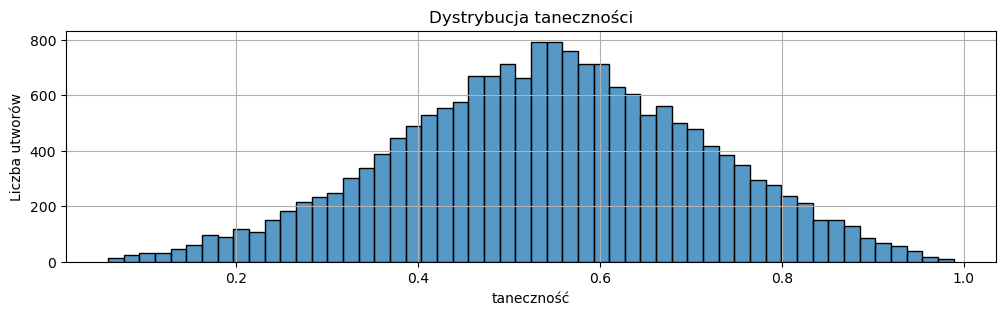

In [69]:
plt.figure(figsize=(12, 3))
sns.histplot(df["taneczność"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja taneczności")
plt.grid()

Utworów o średnim stopniu taneczności jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami taneczność i gatunek:

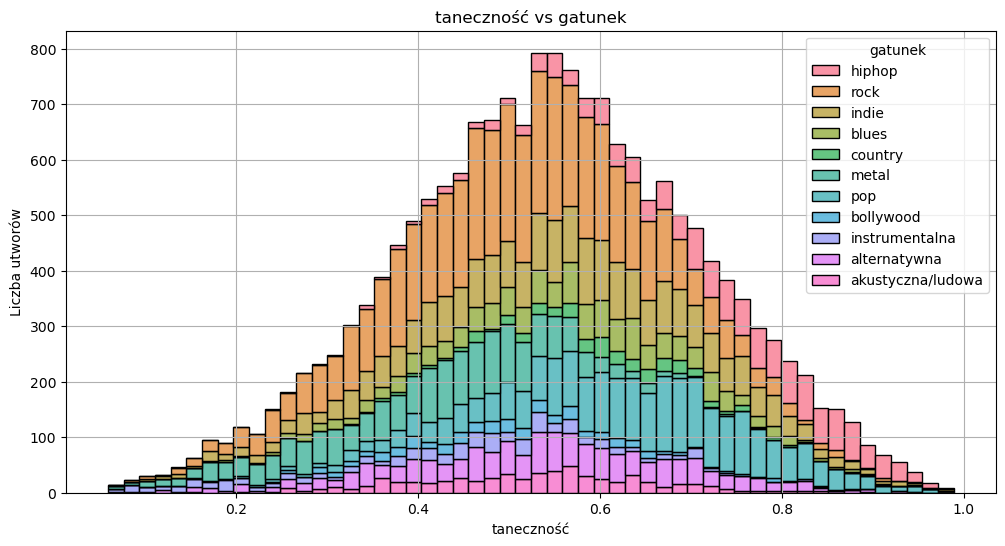

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["taneczność"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("taneczność vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary taneczność - gatunek wynosi 0.164171 i jest to przeciętna wartość. 

##### energia

Zacznijmy od dystrybucji tej cechy:

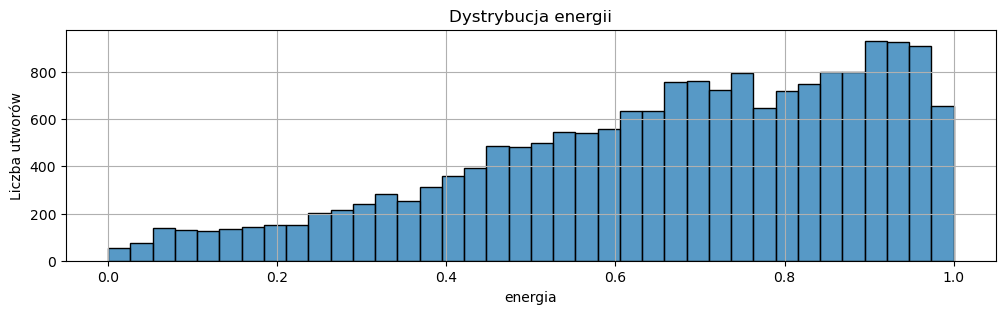

In [71]:
plt.figure(figsize=(12, 3))
sns.histplot(df["energia"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja energii")
plt.grid()

Utworów o wysokim poziomie energii jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami energia i gatunek:

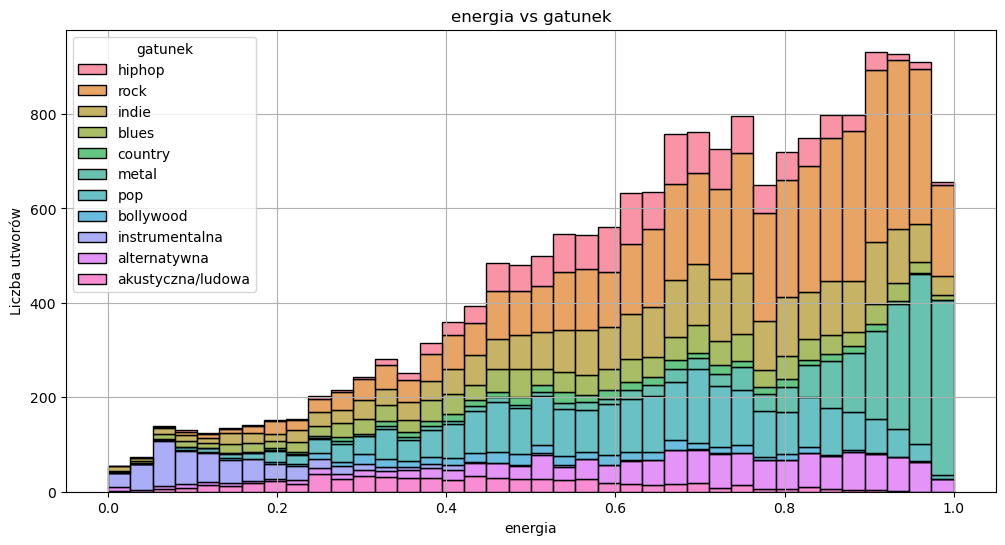

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["energia"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("energia vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary energia - gatunek wynosi 0.215810 i jest to druga najwyższa wartość. 

##### głośność

Zacznijmy od dystrybucji tej cechy:

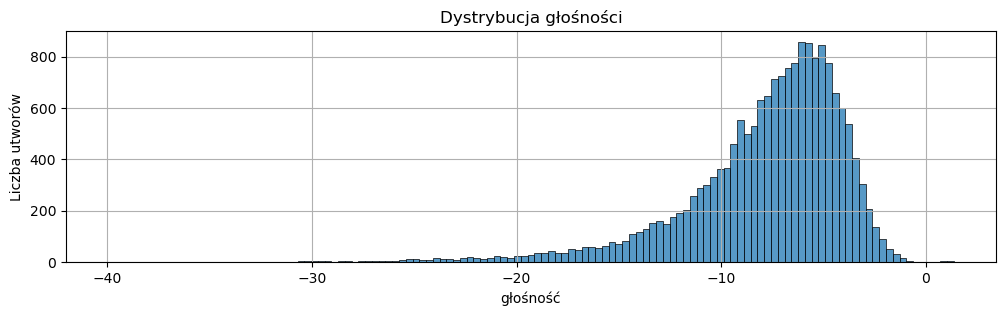

In [73]:
plt.figure(figsize=(12, 3))
sns.histplot(df["głośność"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja głośności")
plt.grid()

Utworów głośnych jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami głośność i gatunek:

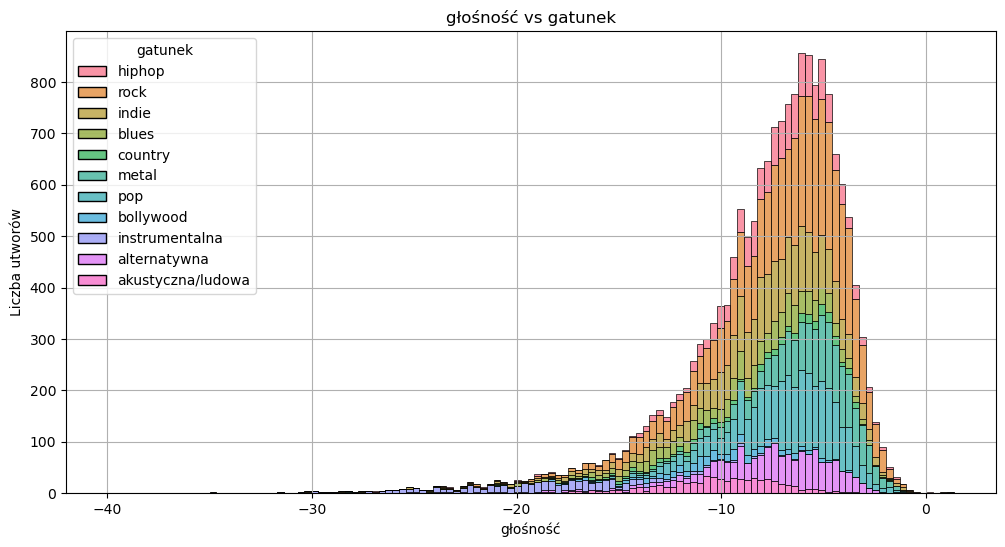

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["głośność"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("głośność vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary głośność - gatunek wynosi 0.129296 i jest to przeciętna wartość. 

##### ilość_mowy

Zacznijmy od dystrybucji tej cechy:

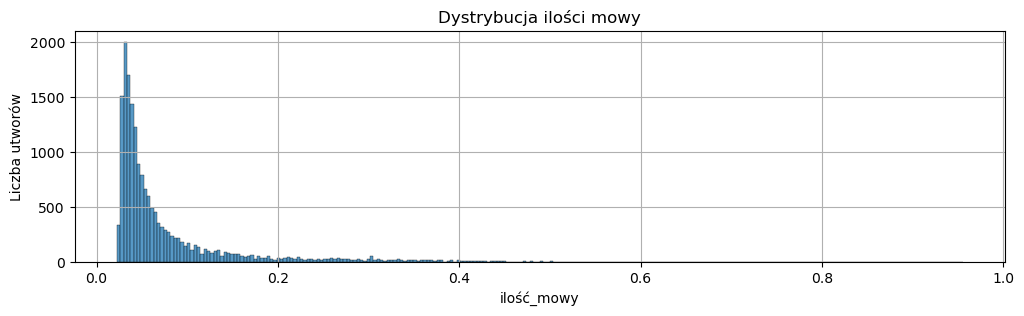

In [75]:
plt.figure(figsize=(12, 3))
sns.histplot(df["ilość_mowy"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja ilości mowy")
plt.grid()

Zdecydowana większość utworów ma niewielką ilość mowy. Przyjrzyjmy się teraz korelacji między cechami ilość_mowy i gatunek:

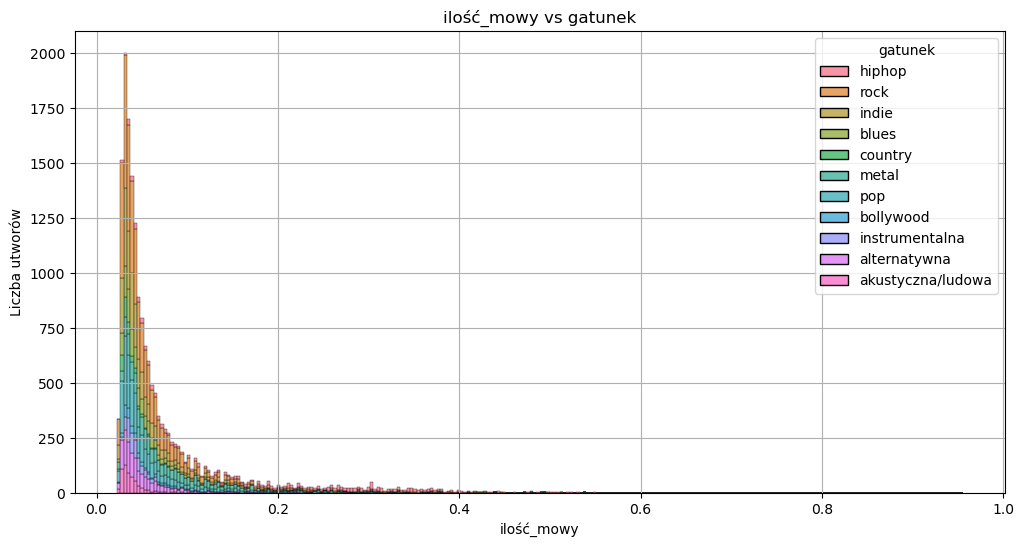

In [76]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["ilość_mowy"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("ilość_mowy vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary ilość_mowy - gatunek wynosi 0.148327 i jest to przeciętna wartość. 

##### akustyczność

Zacznijmy od dystrybucji tej cechy:

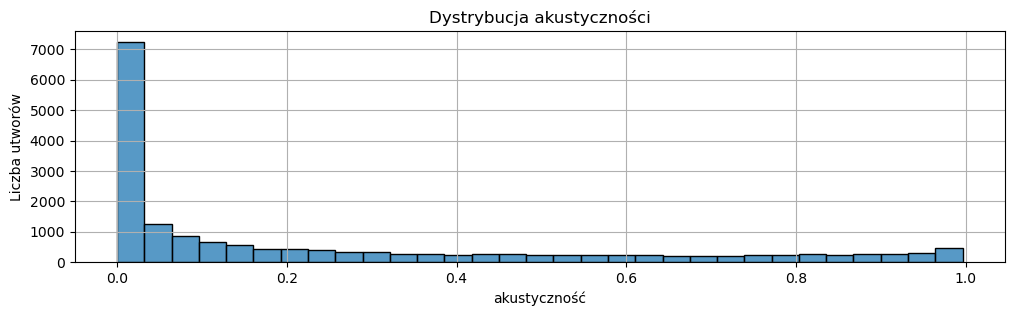

In [77]:
plt.figure(figsize=(12, 3))
sns.histplot(df["akustyczność"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja akustyczności")
plt.grid()

Utworów o niskim stopniu akustyczności jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami akustyczność i gatunek:

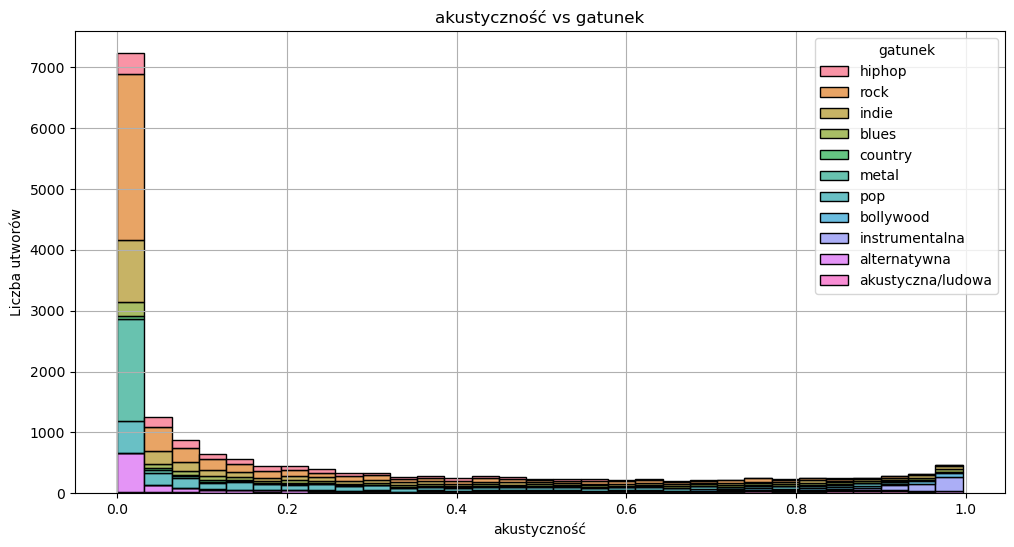

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["akustyczność"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("akustyczność vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary akustyczność - gatunek wynosi 0.276480 i jest najwyższa wartość. 

##### instrumentalność

Zacznijmy od dystrybucji tej cechy:

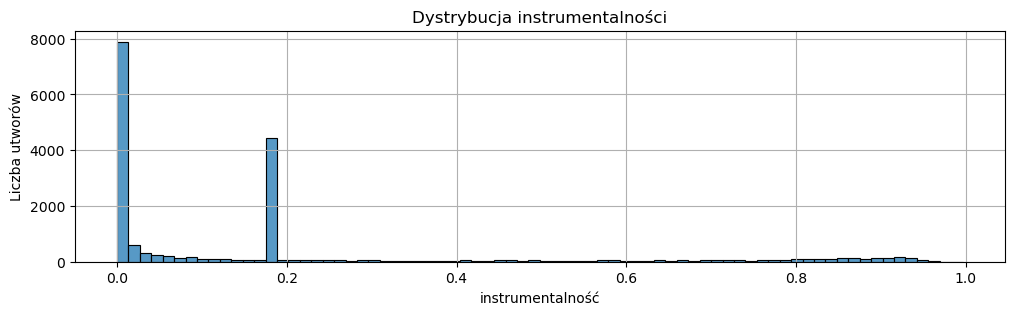

In [79]:
plt.figure(figsize=(12, 3))
sns.histplot(df["instrumentalność"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja instrumentalności")
plt.grid()

Utworów o niższych poziomach instrumentalności jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami instrumentalność i gatunek:

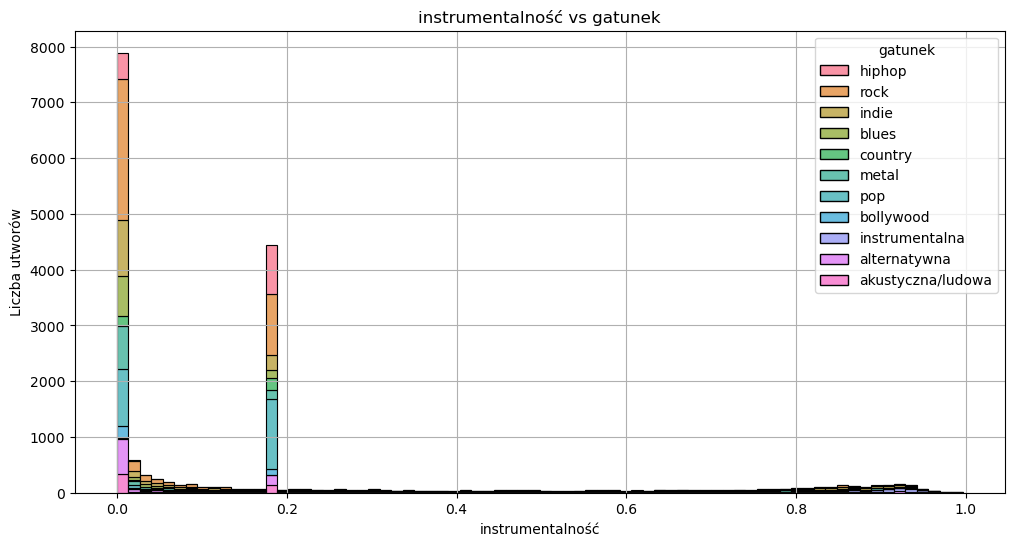

In [80]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["instrumentalność"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("instrumentalność vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary instrumentalność - gatunek wynosi 0.169059 i jest to przeciętna wartość. 

##### ton_emocjonalny

Zacznijmy od dystrybucji tej cechy:

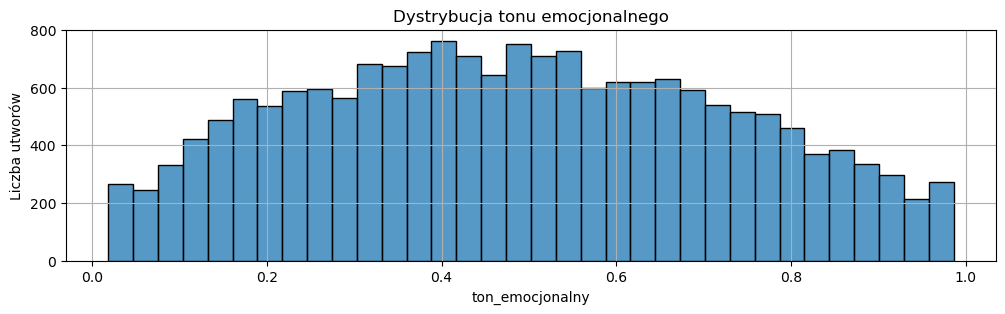

In [81]:
plt.figure(figsize=(12, 3))
sns.histplot(df["ton_emocjonalny"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja tonu emocjonalnego")
plt.grid()

Najwięcej jest utworów o średnim poziomie tonu emocjonalnego. Przyjrzyjmy się teraz korelacji między cechami ton_emocjonalny i gatunek:

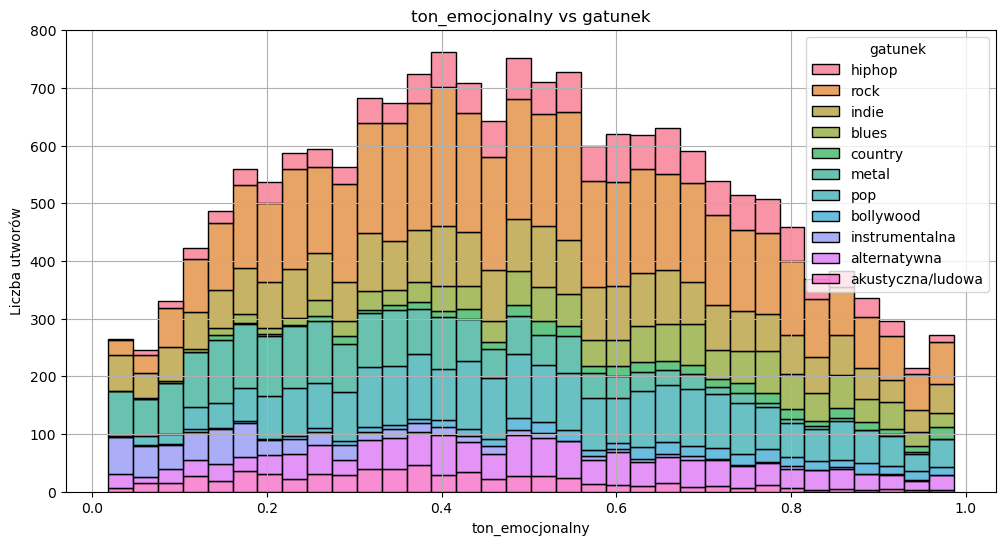

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["ton_emocjonalny"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("ton_emocjonalny vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary ton_emocjonalny - gatunek wynosi 0.085737 i jest to druga najniższa wartość. 

##### tempo

Zacznijmy od dystrybucji tej cechy:

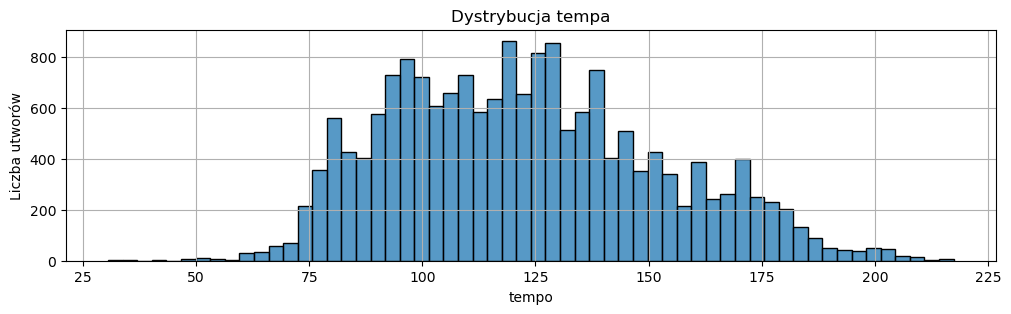

In [83]:
plt.figure(figsize=(12, 3))
sns.histplot(df["tempo"]).set(ylabel='Liczba utworów')
plt.title("Dystrybucja tempa")
plt.grid()

Utworów o średnim tempie jest najwięcej. Przyjrzyjmy się teraz korelacji między cechami tempo i gatunek:

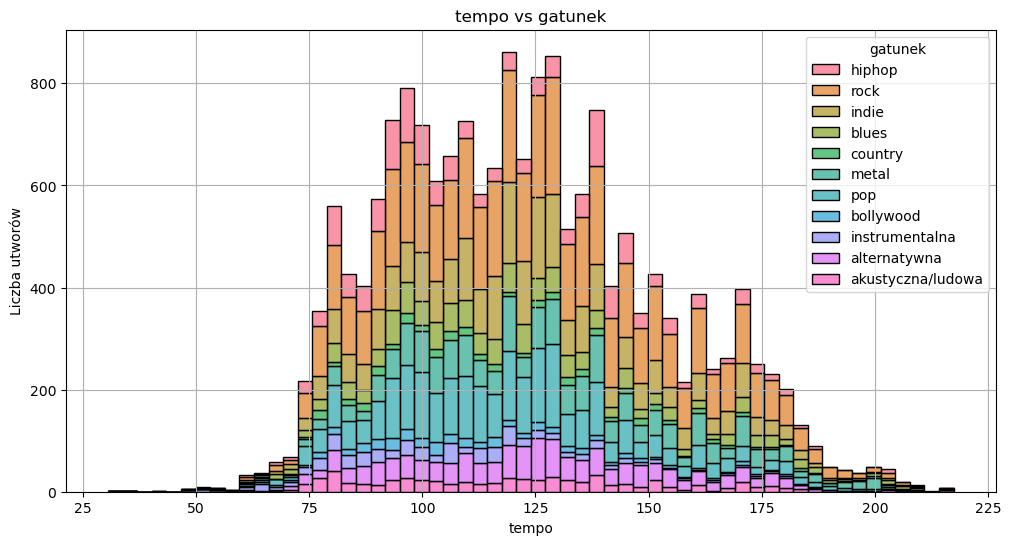

In [84]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df["tempo"], hue="gatunek", multiple='stack').set(ylabel='Liczba utworów')
plt.title("tempo vs gatunek")
plt.grid()

Wartość informacji wzajemnej dla pary tempo - gatunek wynosi 0.069640 i jest to najniższa wartość. 

### Przygotowanie danych do trenowania modeli

Kolejne kroki związane są z inżynierią danych i przygotowaniem danych do trenowania modeli. Ważne jest, aby czynności te wykonać w odpowiedniej kolejności, dzięki czemu unikniemy wycieku danych i zachowamy integralność danych testowych, co jest istotne zwłaszcza w kontekście późniejszej ewaluacji modeli.

W szczególności, kolejność ta jest następująca:

1) Podział danych na zbiór treningowy i testowy
2) Czynności związane z inżynierią cech (np. kodowanie danych kategorycznych, skalowanie danych numerycznych)
3) Balansowanie danych (np. metodą SMOTE)

W przypadku drugiego etapu, w ramach inżynierii cech, najpierw kodujemy dane kategoryczne na numeryczne, a dopiero potem dokonujemy ich skalowania. W przypadku naszego zbioru poza kolumną docelową nie ma danych kategorycznych, więc kodowanie odpada.

### Podział danych na zbiór treningowy i zbiór testowy

Zanim przystąpimy do transformacji danych w ramach inżynierii cech, podzielimy dane na dwa oddzielne zbiory, zbiór treningowy i zbiór testowy. Wykorzystamy do tego metodę train_test_split z bibioteki sklearn:

In [85]:
from sklearn.model_selection import train_test_split

Najpierw musimy oddzielić kolumnę docelową od pozostałych:

In [86]:
X = df.drop(columns=['gatunek']) 
y = df['gatunek'] 

X to dane wejściowe, czyli wszystkie cechy oprócz tej, którą chcemy przewidzieć.<br>
y to wartość docelowa, którą chcemy przewidzieć.

Teraz podzielimy dane na zbiór treningowy i testowy:

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Parametr test_size używany jest do określenia proporcji, w jakich następuje podział na oba zbiory. W tym przypadku 20% danych będzie przypisane do zbioru testowego, pozostałe 80% do treningowego.

Parametr random_state zapewnia odtwarzalność podziału. Ogólnie podział polega na przypadkowym przypisaniu odpowiednich ilości danych do każdego zbioru, za każdym razem inaczej. Dzięki temu parametrowi podział staje się deterministyczny, czyli za każdym razem uzyskujemy identyczne zbiory. Do parametru tego często przypisuje się wartość 42, ale może to być każda dowolna wartość.

Funkcja train_test_split zwraca:
- X_train - zbiór treningowy cech, używanych do trenowania modeli
- X_test - zbiór testowy cech, używanych do ewaluacji modeli
- y_train - zbiór treningowy wartości docelowych
- y_test - zbiór testowy wartości docelowych

### Inżynieria cech

Inżynieria cech to szeroki temat, który obejmuje w szczególności:

- tworzenie nowych cech:
  - w oparciu o znajomość danej domeny
  - w oparciu o obserwację wzorów występujących w danych
  - poprzez łączenie istniejących cech
- transformacje cech:
  - normalizacja (zmiana skali cech na podobny zakres, np. od 0 do 1, dzięki czemu żadna cecha nie dominuje nad pozostałymi)
  - skalowanie (zmiana cech w celu uzyskania podobnej skali, np. odchylenia standardowego równego 1, dzięki czemu mamy pewność, że wszystkie cechy uwzględnione są w równym stopniu)
    - skalowanie min-max (zmiana skali do określonego zakresu, np. 0-1, przez odjęcie wartości minimalnej i podzielenie przez zakres)
    - skalowanie standardowe (zmiana skali w celu uzyskania średniej równej 0 i odchylenia standardowego równego 1, dokonywana przez odjęcie średniej i podzielenie przez odchylenie standardowe)
    - skalowanie odporne (zmiana skali w celu zapewniena odporności na wartości odstające - outliers, dokonywana poprzez podzielenie ich przez zakres interkwartylowy)
  - kodowanie (zmiana cech kategorycznych na numeryczne, np. kodowanie one-hot i kodowanie etykiet)
  - transformacje matematyczne (w celu zmiany rozkładu lub skali cech, np. transformacja logarytmiczna, pierwiastkowa, odwrotna, itp.)
- ekstrakcja cech
  - redukcja wymiarowości (redukcja liczby cech przy zachowaniu ważnych informacji, np. PCA, t-SNE)
  - kombinacja cech (łącznie kilku cech w jedną)
  - agregacja cech (tworzenie nowych cech przez agragację cech istniejących, np. cechy będącej sumą albo średnią innych cech)
  - transformacja reprezentacji (nowa reprezentacja cechy lub jej części)
 
Oczywiście nie oznacza to, że w każdym przypadku wykonujemy wszystkie te operacje. To, które wykonujemy, zależy od samych danych oraz od tego, co chcemy osiągnąć. 

W naszym zbiorze mamy tylko dane numeryczne. W ramach inżynierii cech wykonamy tylko jedną operację, skalowanie standardowe. Podobnie, jak w przypadku podziału na zbiór treningowy i testowy, skorzystamy z gotowych rozwiązań:

In [88]:
from sklearn.preprocessing import StandardScaler

Ważne jest, aby skalowanie było początkowo wykonane jedynie na zbiorze treningowym, tak aby dane ze zbioru testowego nie miały wpływu na proces skalowania. Pozwoli nam to zapobiec wyciekowi danych. Następnie, uzyskane w ten sposób parametry, tj. średnia i odchylenie standardowe, będą zastosowane do zbioru testowego.

Przyjrzyjmy się danym w zbiorze treningowym przed skalowaniem:

In [89]:
X_train.head()

,popularność,taneczność,energia,głośność,ilość_mowy,akustyczność,instrumentalność,ton_emocjonalny,tempo
3386,52.0,0.707,0.513,-9.540,0.0242,0.063000,0.022200,0.574,96.345
12447,79.0,0.207,0.243,-8.181,0.0306,0.925000,0.034200,0.394,171.648
2530,75.0,0.591,0.719,-7.824,0.2150,0.020100,0.000003,0.142,100.014
13660,56.0,0.724,0.806,-6.843,0.2950,0.054100,0.177562,0.586,93.863
13178,23.0,0.297,0.913,-7.853,0.1280,0.000017,0.317000,0.361,169.856


Przeskalujmy dane:

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Przyjrzyjmy się naszym danym po przeskalowaniu:

In [91]:
X_train.head()

,popularność,taneczność,energia,głośność,ilość_mowy,akustyczność,instrumentalność,ton_emocjonalny,tempo
3386,0.424800,0.992338,-0.639609,-0.397824,-0.662856,-0.587647,-0.586153,0.365960,-0.891319
12447,1.989563,-2.031086,-1.784198,-0.063629,-0.586316,2.190050,-0.540966,-0.385330,1.656943
2530,1.757746,0.290904,0.233670,0.024162,1.618988,-0.725887,-0.669738,-1.437136,-0.767160
13660,0.656617,1.095135,0.602482,0.265403,2.575737,-0.616326,-0.001122,0.416046,-0.975310
13178,-1.255870,-1.486870,1.056078,0.017031,0.578525,-0.790602,0.523947,-0.523066,1.596301


Dane zostały przeskalowane w taki sposób, że ich średnia wynosi 0, a odchylenie standardowe 1.

### Niezbalansowane dane - metoda SMOTE

Problem niezbalansowanych danych dotyczy głównie cechy docelowej, ale może dotyczyć także cech silnie skorelowanych z cechą docelową. Polega on na tym, rozkład cechy docelowej jest mocno asymetryczny i jedna klasa dominuje znacznie nad pozostałymi.

Może to negatywnie wpływać na proces trenowania modelu, gdyż wartość mniejszościowa nie będzie miała odpowiedniego wkładu w uczenie modelu. Niezbalansowane dane mogą być przyczyną błędnych metryk dla modelu, gdyż nawet jeśli model będzie za każdym razem przewidywać klasę dominującą, i tak będzie uzyskiwać dużą dokładność.

Problem niezbalansowanych danych możemy rozwiązać na przykład za pomocą metody SMOTE (Synthetic Minority Oversampling Technique), która polega na generowaniu próbek syntetycznych z klasy mniejszościowej. Aby uniknąć wycieku danych, stosujemy ją tylko dla zbioru treningowego.

Metoda SMOTE ma zastosowanie przede wszystkim w klasyfikacji binarnej, ale można ją także zaadaptować do klasyfikacji niebinarnej.

Metodę SMOTE stosujemy do przeskalowanych danych, aby generowane dane mieściły się w tej samej przestrzeni cech. Na początek sprawdźmy, czy cecha docelowa jest zbalansowana:

In [92]:
y_train.value_counts()

gatunek
rock                 3930
indie                2065
pop                  1977
metal                1490
hiphop               1152
alternatywna         1107
blues                1023
akustyczna/ludowa     498
instrumentalna        475
country               315
bollywood             308
Name: count, dtype: int64

Jak widać, liczby danych w poszczególnych klasach są różne. Liczba utworów w najmniej licznej klasie stanowi mniej niż 10% liczby utworów w najliczniejszej klasie. Różnice ilościowe pomiędzy pozostałymi klasami są znacznie mniejsze. 

W klasyfikacji niebinarnej jako alternatywę do metody SMOTE stosuje się czasem podpróbkowanie (undersampling), które może jednak doprowadzić do usunięcia wielu, a teoretycznie nawet wszystkich, próbek z klas mniejszościowych.

W związku z tym, że zarówno metoda SMOTE niesie ze sobą ryzyko nadmiernego dopasowania (overfitting), a podpróbkowanie stwarza ryzyko utraty cennych danych, można z tego etapu zrezygnować, jeżeli dane są niezbalansowane w umiarkowanym stopniu. W przypadku naszego zbioru możemy z tego zrezygnować i przystąpić od razu do trenowania modeli.

## 3. Trenowanie modeli

Wytrenujemy kilka tradycyjnych modeli ML, a następnie porównamy je za pomocą łatwych do zrozumienia metryk. 

Zaczniemy od tradycyjnych modeli uczenia maszynowego, a następnie przejdziemy do MLP.

### Tradycyjne modele uczenia maszynowego

Zacznijmy od zaimportowania niezbędnych modeli tradycyjnego uczenia maszynowego i metryk:

In [93]:
# tradycyjne modele uczenia maszynowego
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    ExtraTreesClassifier
)

# metryki
from sklearn.metrics import (
    accuracy_score,
    precision_score, 
    recall_score,      
    f1_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score
)

Proces trenowania i ewaluacji modeli jest powtarzalny i obejmuje następujące kroki dla każdego modelu:
1) tworzenie modelu z zestawem hiperparametrów (zaczniemy z domyślnymi wartościami hiperparametrów)
2) trenowanie modelu
3) użycie modelu w celu predykcji cechy docelowej w zbiorze testowym
4) ewaluacja modelu

Dla uproszczenia, umieścimy wszystkie modele z słowniku. Utworzymy je na razie z domyślnymi wartościami hiperparametrów. Wyjątkiem od tej reguły, tam gdzie to możliwe, będzie hiperparametr random_state, którego użyjemy w celu zapewnienia powtarzalności wyników.

Niektóre hiperparametry mogą później wymagać dostrojenia, ale nie będziemy tego wiedzieli przed przetrenowaniem modeli. Każdy model posiada bardzo dużo hiperparametrów, niektóre z nich mogą przyjmować wartości w dużych zakresach, ale na ten moment nie będziemy się nimi przejmować.

Oto nasze modele:

In [94]:
models = {
    'Naiwny klasyfikator Bayesa': GaussianNB(),
    'Regresja logistyczna': LogisticRegression(),
    'Metoda k-najbliższych sąsiadów': KNeighborsClassifier(),
    'Drzewo decyzyjne': DecisionTreeClassifier(random_state=42),
    'Las losowy': RandomForestClassifier(random_state=42),
    'Wzmocnienie gradientowe': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

Aby uprościć sobie zadanie, zdefiniujmy kilka funckji. Zacznijmy od funkcji ewaluującej model:

In [95]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    
    metrics = {
        'Dokładność': accuracy,
        'Precycja': precision,
        'Czułość': recall,    
        'Wynik F1': f1,
        'ROC AUC': roc_auc
    }
    
    s_metrics = pd.Series(metrics)

    print('METRYKI KLASYFIKACJI\n')
    for key, value in metrics.items():
        print(f'{key}: {value:.4f}')

    print()

    # Raport z klasyfikacji
    print('RAPORT Z KLASYFIKACJI\n')
    print(classification_report(y_test, y_pred, zero_division=0))
    print()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Podstawowe metryki
    s_metrics.plot(ax=axes[0], kind='bar', grid=True)
    axes[0].set_title('PODSTAWOWE METRYKI')
            
    # Tablica pomyłek   
    cm = confusion_matrix(y_test, y_pred)      
    ConfusionMatrixDisplay(
        confusion_matrix = cm, 
        display_labels = gatunki.values()).plot(ax=axes[1])
    axes[1].set_title('TABLICA POMYŁEK')
    axes[1].set_xlabel('Klasa predykowana')  
    axes[1].set_ylabel('Klasa rzeczywista')  
    axes[1].tick_params(axis='x', rotation=80)     
    
    plt.tight_layout()
    plt.show()
    
    return metrics

Aby zrozumieć jak działa powyższa funkcja, przypomnijmy sobie wszystkie metryki, jakie są w niej wykorzystane:

**<u>Dokładność (Accuracy)</u>** - stosunek prawidłowych klasyfikacji do wszystkich klasyfikacji<br>

$ \text{Dokładność} = \frac{\text{Prawdziwie Pozytywne (True Positives)}\, + \,\text{Prawdziwie Negatywne (True Negatives)}}{\text{Wszystkie klasyfikacje}} $<br>

Dokładność odpowiada na pytanie: Jak często model ma rację?<br>
Największe znaczenie ma dla zbiorów zbalansowanych.<br>


**<u>Precyzja (Precision)</u>** - stosunek klasyfikacji prawdziwie pozytywnych (true positive) do wszystkich klasyfikacji pozytywnych<br>

$ \text{Precyzja} = \frac{\text{Prawdziwie Pozytywne (True Positives)}}{\text{Prawdziwie Pozytywne (True Positives)}\, + \,\text{Fałszywie Pozytywne (False Positives)}} $<br>

Precyzja odpowiada na pytanie: Jak często klasyfikacje pozytywne są prawidłowe?<br>
Ma ona największe znaczenie gdy zależy nam szczególnie na minimalizacji klasyfikacji fałszywie pozytywnych.<br>


**<u>Czułość (Recall)</u>** - stosunek klasyfikacji prawdziwie pozytywnych (true positive) do wszystkich klasyfikacji pozytywnych<br>

$ \text{Czułość} = \frac{\text{Prawdziwie Pozytywne (True Positives)}}{\text{Prawdziwie Pozytywne (True Positives)}\, + \,\text{Fałszywie Negatywne (False Negatives)}} $<br>

Czułość nazywany jest również współczynnikiem prawdziwie pozytywnych.Odpowiada ona na pytanie: Ile spośród wszystkich rzeczywistych pozytywnych zostało sklasyfikowane prawidłowo?<br>
Ma ona największe znaczenie gdy zależy nam szczególnie na minimalizacji klasyfikacji fałszywie negatywnych.<br>


**<u>Wynik F1 (F1 Score)</u>** - średnia harmoniczna precyzji i czułości<br>

$ \text{F1} = 2\, \times \,\frac{\text{Precyzja (Precision)}\, \times \,\text{Czułość (Recall)}}{\text{Precyzja (Precision)}\, + \,\text{Czułość (Recall)}} $<br>

Metryka ta jest najbardziej przydatna w przypadku zbiorów niezbalansowanych, gdzie potrzebna jest nam jedna metryka aby zbalansować precyzję i czułość.<br>


**<u>Krzywa AUC-ROC (AUC-ROC Curve)</u>** (Obszar pod krzywą charakterystyki operacyjnej odbiornika) - graficzna reprezentacja wydajności modelu klasyfikacji binarnej na różnych wartościach progowych<br>

Mamy tu dwa pojęcia:
- Krzywa ROC (ROC Curve) - Krzywa charakterystyki operacyjnej odbiornika (Receiver Operating Characteristic Curve) - wykres zależności między czułością (odsetek prawdziwie pozytywnych) a odsetkiem fałszywie pozytywnych na różnych wartościach progowych
- AUC - Obszar pod krzywą (Area Under the Curve) - pojedyncza wartość między 0 a 1 opisująca krzywą (1 oznacza doskonałą klasyfikację, 0.5 oznacza klasyfikację losową)

Krzywa AUC-ROC używana jest do oceny ogólnej wydajności modelu i ma największe zastosowanie w przypadku zbiorów niezbalansowanych.<br>

Czym bliżej krzywa jest lewego górnego rogu (0.0, 1.0), tym lepsza jest zdolność klasyfikacyjna modelu.<br>


**<u>Tablica pomyłek (Confusion Matrix)</u>** - zestawienie wyników klasyfikacji: prawdziwie pozytywne (true positives), prawdziwie negatywne (true negatives), przewidywane pozytywne (predicted positives) i przewidywane negatywne (predicted negatives)<br>
Informuje nas gdzie model popełnia błędy klasyfikacyjne.

W przypadku klasyfikacji niebinarnej, z jaką mamy tu do czynienia, powyższe metryki ulegają pewnym adaptacjom: 
- Precyzja, czułość i wynik F1 obliczone są metodą macro-averaging, czyli poprzez obliczenie każdej metryki niezależnie dla każdej klasy, a następnie obliczenie średniej z uzyskanych w ten sposób wyników.
- ROC AUC obliczone jest na zasadzie jeden kontra reszta dla każdej klasy, a nastepnie obliczona jest średnia.
- Tablica pomyłek jest znacznie bardziej rozbudowana niż w przypadku klasyfikacji binarnej i trudniejsza do szybkiej interpretacji. Podobnie jak w przypadku klasyfikacji binarnej, możemy z niej odczytać liczbę klasyfikacji prawdziwie pozytywnych, fałszywie pozytywnych, prawdziwie negatywnych i fałszywie negatywnych, z tym że dla każdej klasy. Najlepiej to pokazać na przykładzie, dlatego dokładniejszy opis sposobu interpretacji tablicy znajduje się poniżej, pod wizualizacją wyników naiwnego klasyfikatora Bayesa.

Istnieją także inne metryki, typowe dla klasyfikacji nie-binarnych, jak np. Log Loss, Cohen's Kappa or Hamming Loss i wiele innych, nie będziemy ich jednak używać dla naszego zbioru danych.

Kolejna funkcja, którą zdefiniujemy, będzie służyła do trenowania i ewaluacji modelu:

In [96]:
def train_evaluate_model(model, model_name):
    print(model_name.upper() + '\n')
        
    # trenuj model
    model.fit(X_train, y_train)

    # dokonaj predykcji
    y_pred = model.predict(X_test)

    # predykuj prawdopodobieństwa dla klasy pozytywnej
    y_prob = model.predict_proba(X_test)
    
    # ewaluuj model
    return evaluate_model(y_test, y_pred, y_prob)

Teraz wytrenujemy zewaluujemy wszystkie modele po kolei:

#### Naiwny klasyfikator Bayesa (Gaussian Naive Bayes)

Naiwny klasyfikator Bayesa jest klasyfikatorem probabilistycznym opartym na twierdzeniu Bayesa. Zakłada on, że cechy rozłożone są zgodnie z rozkładem Gaussa.

NAIWNY KLASYFIKATOR BAYESA

METRYKI KLASYFIKACJI

Dokładność: 0.3897
Precycja: 0.3596
Czułość: 0.3878
Wynik F1: 0.3416
ROC AUC: 0.8121

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.17      0.51      0.26       126
     alternatywna       0.00      0.00      0.00       262
            blues       0.29      0.14      0.19       243
        bollywood       0.61      0.26      0.36        89
          country       0.16      0.14      0.15        72
           hiphop       0.64      0.60      0.62       293
            indie       0.41      0.14      0.21       513
   instrumentalna       0.53      0.94      0.67       100
            metal       0.40      0.71      0.51       357
              pop       0.35      0.33      0.34       544
             rock       0.40      0.50      0.44       986

         accuracy                           0.39      3585
        macro avg       0.36      0.39      0.34      3585
     weighted

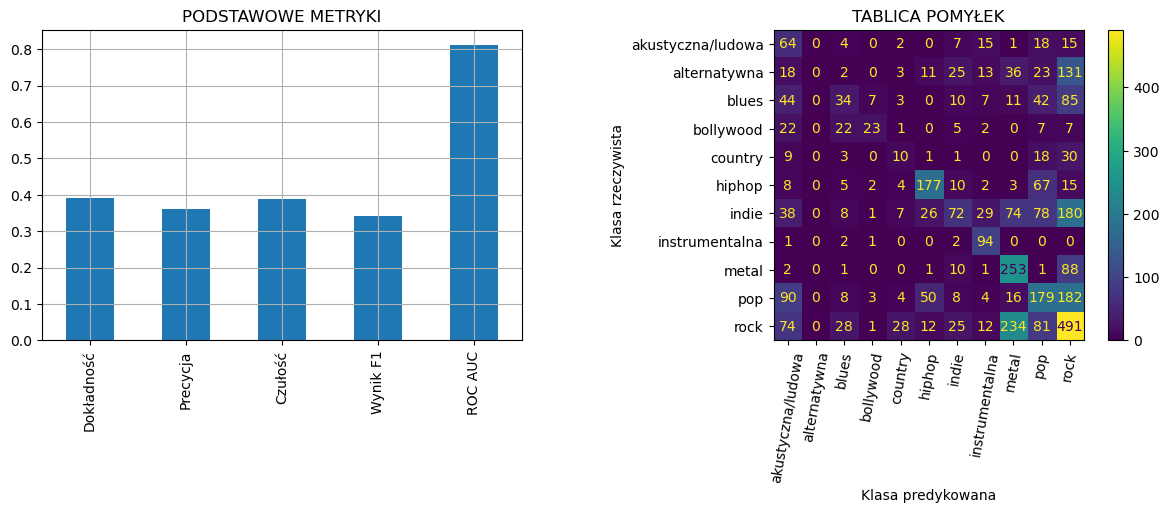

In [97]:
gnb = train_evaluate_model(models['Naiwny klasyfikator Bayesa'], 'Naiwny klasyfikator Bayesa')

Na przykładzie powyższej tablicy pomyłek przedstawimy sposób jej interpretacji.

W tablicy podane są liczby klasyfikacji prawdziwie pozytywnych (TP), fałszywie pozytywnych (FP), prawdziwie negatywnych (TN) i fałszywie negatywnych (FN). Liczby te odczytujemy dla każdej klasy oddzielnie. Jako przykład przeanalizujmy klasę hiphop. Dla tej klasy możemy odczytać następujące wartości:

- TP: 177 (liczba na przecięciu klasy hiphop na obu osiach),
- FP: 0 + 11 + 0 + 0 + 1 + 26 + 0 + 1 + 50 + 12 = 101 (suma wartości dla pozostałych klas w kolumnie hiphop), przykładowo 12 próbek klasy rock i 50 próbek klasy pop zostało błędnie sklasyfikowanych jako hiphop; ogólnie 101 próbek nie-hiphop zostało sklasyfikowanych jako hiphop.
- FN: 8 + 0 + 5 + 2 + 4 + 10 + 2 + 3 + 67 + 15 = 116 (suma wartości dla pozostałych klas w wierszu hiphop), przykładowo 15 próbek klasy hiphop zostało błędnie sklasyfikowanych jako rock, a 67 jako pop; ogólnie 116 próbek klasy hiphop zostało sklasyfikowanych jako nie-hiphop,
- TN - suma wszystkich pozostałych wartości w tablicy, tj. wszystkich wartości w tablicy z wyjątkiem wartości w wierszu i kolumnie hiphop.

**Interpretacja:**

Dokładność jest dość niska, niecałe 39% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest dość niska, średnio niecałe 36% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Regresja logistyczna

Regresja logistyczna to model liniowy, który oblicza prawdopodobieństwo wyniku binarnego przy użyciu funkcji logistycznej.

REGRESJA LOGISTYCZNA

METRYKI KLASYFIKACJI

Dokładność: 0.4410
Precycja: 0.3891
Czułość: 0.3777
Wynik F1: 0.3721
ROC AUC: 0.8276

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.25      0.19      0.22       126
     alternatywna       0.00      0.00      0.00       262
            blues       0.25      0.22      0.23       243
        bollywood       0.59      0.44      0.50        89
          country       0.11      0.01      0.02        72
           hiphop       0.63      0.61      0.62       293
            indie       0.36      0.19      0.25       513
   instrumentalna       0.70      0.86      0.77       100
            metal       0.55      0.50      0.52       357
              pop       0.41      0.45      0.43       544
             rock       0.42      0.69      0.53       986

         accuracy                           0.44      3585
        macro avg       0.39      0.38      0.37      3585
     weighted avg  

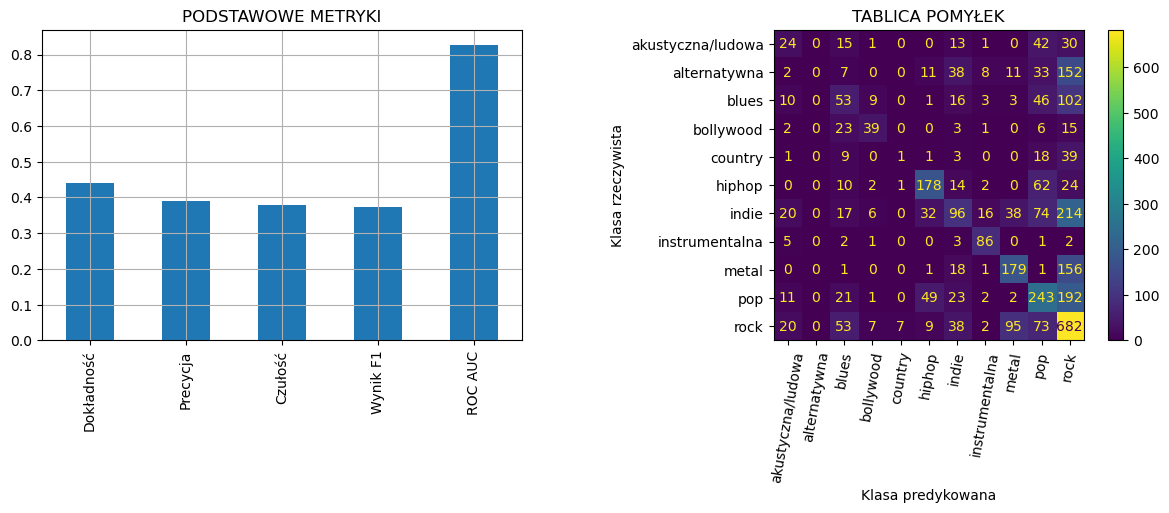

In [98]:
lr = train_evaluate_model(models['Regresja logistyczna'], 'Regresja logistyczna')

**Interpretacja:**

Dokładność jest dość niska, ok. 44% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest dość niska, średnio niecałe 39% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Metoda k-najbliższych sąsiadów

Metoda k-najbliższych sąsiadów to model, który klasyfikuje dane na podstawie klasy większościowej swoich najbliższych sąsiadów w przestrzeni cech. 

METODA K-NAJBLIŻSZYCH SĄSIADÓW

METRYKI KLASYFIKACJI

Dokładność: 0.3847
Precycja: 0.3784
Czułość: 0.3903
Wynik F1: 0.3815
ROC AUC: 0.7505

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.20      0.31      0.24       126
     alternatywna       0.10      0.09      0.10       262
            blues       0.24      0.25      0.25       243
        bollywood       0.58      0.46      0.51        89
          country       0.19      0.15      0.17        72
           hiphop       0.60      0.67      0.63       293
            indie       0.23      0.22      0.23       513
   instrumentalna       0.69      0.80      0.74       100
            metal       0.47      0.53      0.50       357
              pop       0.43      0.38      0.40       544
             rock       0.44      0.42      0.43       986

         accuracy                           0.38      3585
        macro avg       0.38      0.39      0.38      3585
     weig

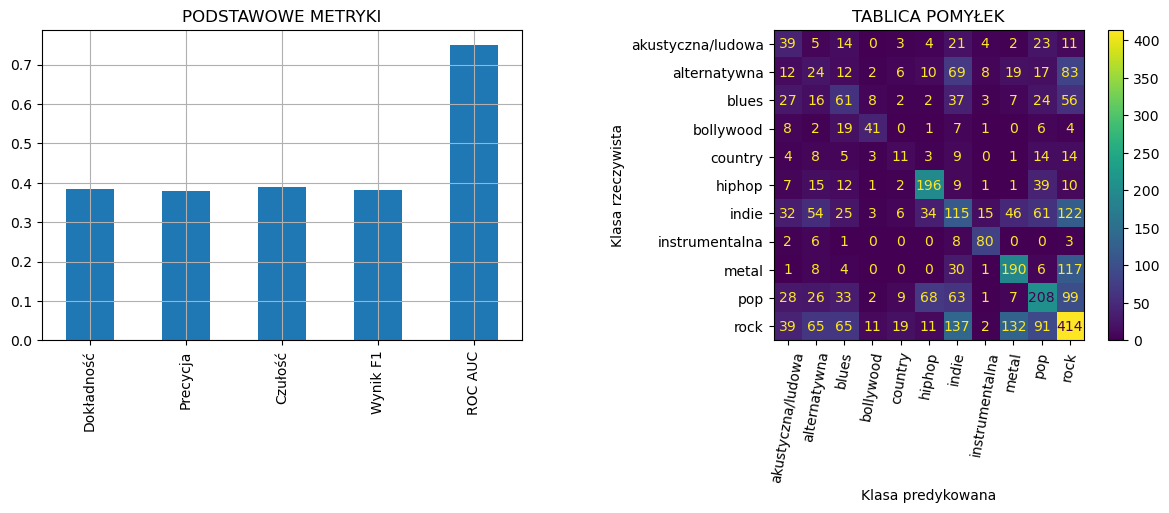

In [99]:
knn = train_evaluate_model(models['Metoda k-najbliższych sąsiadów'], 'Metoda k-najbliższych sąsiadów')

**Interpretacja:**

Dokładność jest dość niska, niecałe 39% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest dość niska, średnio niecałe 38% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Drzewo decyzyjne

Drzewo decyzyjne to model o strukturze drzewa, który dzieli dane na podstawie określonych progów cech, aby utworzyć reguły decyzyjne. Jeśli nie jest przycięte, łatwo może dojść do nadmiernego dopasowania.

DRZEWO DECYZYJNE

METRYKI KLASYFIKACJI

Dokładność: 0.3054
Precycja: 0.3134
Czułość: 0.3076
Wynik F1: 0.3092
ROC AUC: 0.6185

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.15      0.19      0.17       126
     alternatywna       0.03      0.05      0.04       262
            blues       0.19      0.21      0.20       243
        bollywood       0.33      0.26      0.29        89
          country       0.13      0.15      0.14        72
           hiphop       0.55      0.54      0.54       293
            indie       0.18      0.19      0.19       513
   instrumentalna       0.67      0.71      0.69       100
            metal       0.46      0.43      0.45       357
              pop       0.38      0.33      0.35       544
             rock       0.36      0.31      0.34       986

         accuracy                           0.31      3585
        macro avg       0.31      0.31      0.31      3585
     weighted avg      

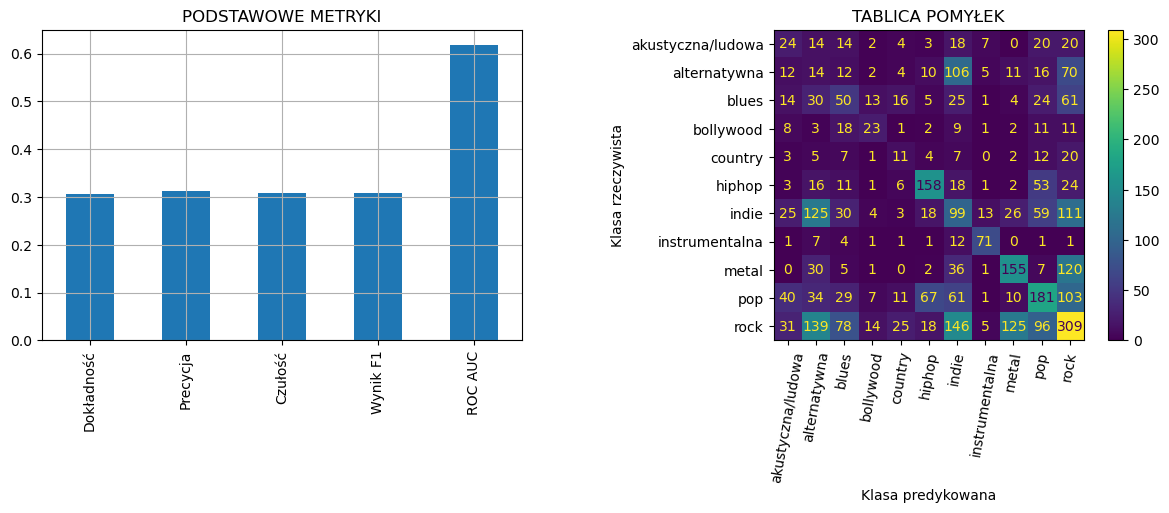

In [100]:
dt = train_evaluate_model(models['Drzewo decyzyjne'], 'Drzewo decyzyjne')

**Interpretacja:**

Dokładność jest dość niska, niecałe 31% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest dość niska, ok. 31% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest średnio wysokie, więc model radzi sobie przeciętnie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Las losowy

Las losowy to zbiór drzew decyzyjnych, gdzie predykcje są uśrednione, co redukuje nadmierne dopasowanie. 

LAS LOSOWY

METRYKI KLASYFIKACJI

Dokładność: 0.4368
Precycja: 0.4364
Czułość: 0.3988
Wynik F1: 0.4054
ROC AUC: 0.8212

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.28      0.25      0.26       126
     alternatywna       0.00      0.00      0.00       262
            blues       0.31      0.31      0.31       243
        bollywood       0.64      0.42      0.50        89
          country       0.38      0.08      0.14        72
           hiphop       0.68      0.71      0.69       293
            indie       0.27      0.24      0.26       513
   instrumentalna       0.72      0.81      0.76       100
            metal       0.62      0.54      0.58       357
              pop       0.48      0.47      0.47       544
             rock       0.43      0.57      0.49       986

         accuracy                           0.44      3585
        macro avg       0.44      0.40      0.41      3585
     weighted avg       0.42 

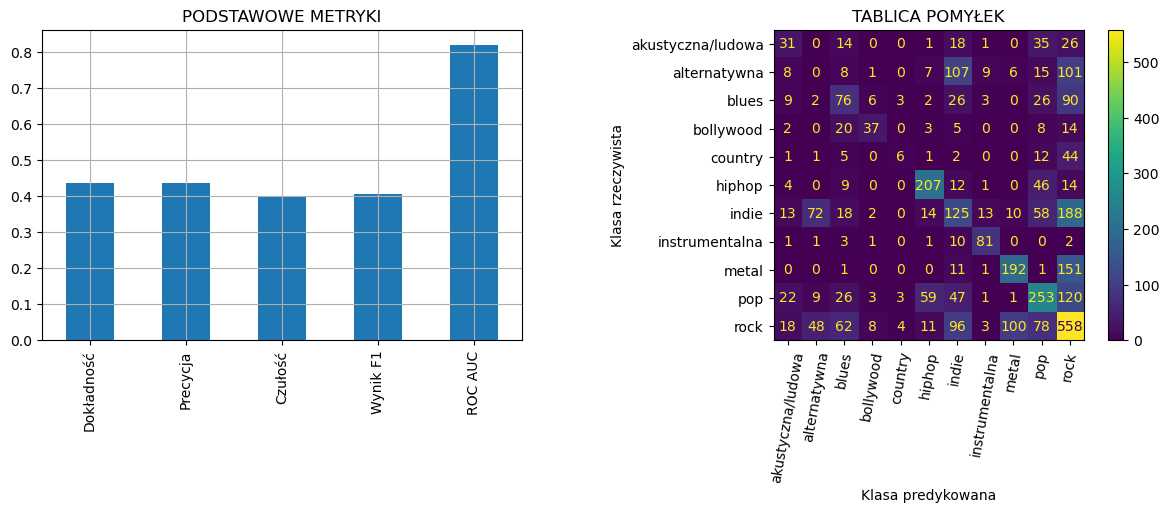

In [101]:
rf = train_evaluate_model(models['Las losowy'], 'Las losowy')

**Interpretacja:**

Dokładność jest dość niska, niecałe 44% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest dość niska, średnio niecałe 44% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Wzmocnienie gradientowe

Wzmocnienie gradientowe to model, który sekwencyjnie buduje drzewa decyzyjne, każdorazowo korygując błędy z poprzednich drzew.

WZMOCNIENIE GRADIENTOWE

METRYKI KLASYFIKACJI

Dokładność: 0.4820
Precycja: 0.4516
Czułość: 0.4290
Wynik F1: 0.4279
ROC AUC: 0.8663

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.25      0.27      0.26       126
     alternatywna       0.00      0.00      0.00       262
            blues       0.41      0.39      0.40       243
        bollywood       0.62      0.45      0.52        89
          country       0.35      0.08      0.13        72
           hiphop       0.66      0.68      0.67       293
            indie       0.38      0.27      0.32       513
   instrumentalna       0.74      0.87      0.80       100
            metal       0.60      0.52      0.56       357
              pop       0.49      0.52      0.51       544
             rock       0.45      0.67      0.54       986

         accuracy                           0.48      3585
        macro avg       0.45      0.43      0.43      3585
     weighted av

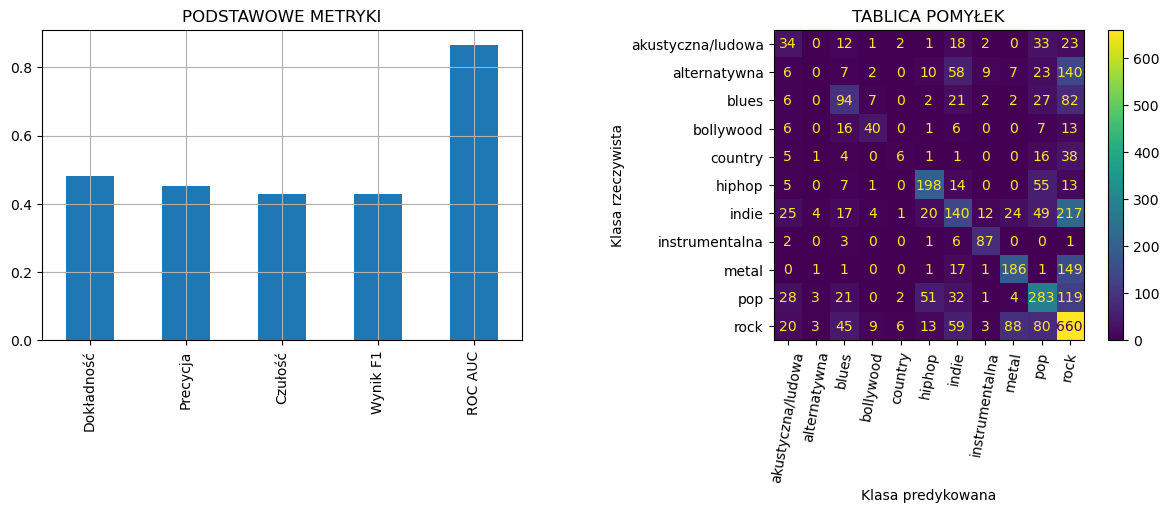

In [102]:
gb = train_evaluate_model(models['Wzmocnienie gradientowe'], 'Wzmocnienie gradientowe')

**Interpretacja:**

Dokładność jest przeciętna, ok. 48% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest przeciętna, średnio ok. 45% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

#### Extra Trees

Extra Trees to zbiór drzew decyzyjnych, podobnie jak las losowy, ale podziały w drzewach są losowe, co przyspiesza trenowanie i redukuje wariancję.

EXTRA TREES

METRYKI KLASYFIKACJI

Dokładność: 0.4346
Precycja: 0.4143
Czułość: 0.3955
Wynik F1: 0.3970
ROC AUC: 0.7881

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.20      0.17      0.18       126
     alternatywna       0.01      0.00      0.00       262
            blues       0.32      0.29      0.30       243
        bollywood       0.67      0.51      0.58        89
          country       0.20      0.04      0.07        72
           hiphop       0.65      0.69      0.67       293
            indie       0.28      0.24      0.26       513
   instrumentalna       0.74      0.86      0.79       100
            metal       0.59      0.52      0.55       357
              pop       0.45      0.45      0.45       544
             rock       0.44      0.58      0.50       986

         accuracy                           0.43      3585
        macro avg       0.41      0.40      0.40      3585
     weighted avg       0.41

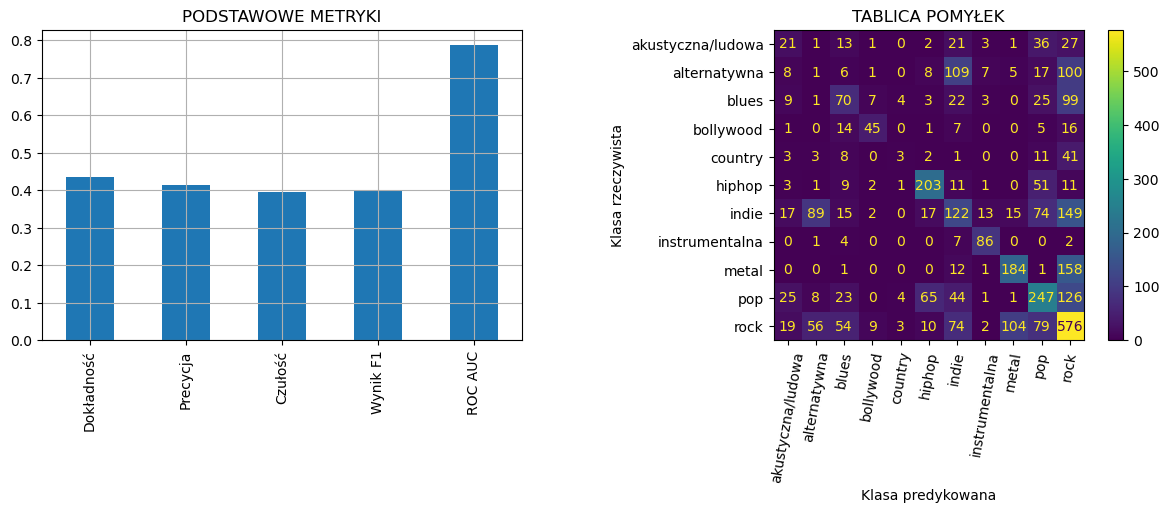

In [103]:
et = train_evaluate_model(models['Extra Trees'], 'Extra Trees')

**Interpretacja:**

Dokładność jest przeciętna, ok. 43% próbek zostało sklasyfikowanych prawidłowo. 

Średnia precyzja dla wszystkich klas jest przeciętna, średnio ok. 41% wszystkich próbek dla każdej klasy sklasyfikowanych było  prawidłowo.

Średnia czułość jest dość niska, model nie radzi sobie najlepiej z identyfikacją każdej klasy na podstawie rzeczywistych próbek należących do niej.

Średni wynik F1 jest dość niski, więc balans między precyzją a czułością dla każdej klasy jest słaby.

Średnie ROC AUC jest wysokie, więc model dobrze radzi sobie z rozróżnianiem klas.

Raport klasyfikacji przedstawia powyższe metryki zbiorczo oraz oddzielnie dla każdej klasy.

W tablicy pomyłek widzimy, klasyfikacja przebiegła różnie dla różnych klas. Najlepiej zostały sklasyfikowane próbki klasy rock, nieco gorzej pop, metal i hiphop. 

### Porównanie modeli

Mamy teraz metryki dla wszystkich modeli. Zachowywaliśmy je podczas trenowania modeli i teraz możemy je porównać. Umieśćmy je w liście: 

In [104]:
model_metrics_list = [gnb, lr, knn, dt, rf, gb, et]

Stwórzmy teraz DataFrame ze wszystkimi metrykami dla każdego modelu:

In [105]:
model_metrics = {
    'Gaussian Naive Bayes': gnb,
    'Logistic Regression': lr,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Extra Trees': et
}

df_metrics = pd.DataFrame(model_metrics).T
df_metrics

,Dokładność,Precycja,Czułość,Wynik F1,ROC AUC
Gaussian Naive Bayes,0.389679,0.359604,0.387756,0.341631,0.812100
Logistic Regression,0.441004,0.389069,0.377736,0.372085,0.827567
K-Nearest Neighbors,0.384658,0.378389,0.390288,0.381475,0.750473
Decision Tree,0.305439,0.313387,0.307581,0.309151,0.618484
Random Forest,0.436820,0.436412,0.398801,0.405385,0.821247
Gradient Boosting,0.482008,0.451551,0.428974,0.427938,0.866318
Extra Trees,0.434589,0.414305,0.395465,0.397030,0.788094


Następnie zwizualizujmy metryki tworząc wykresy słupkowe dla każdej z nich. W ten sposób będziemy mogli porównać wszystkie metryki dla wszystkich modeli. Kod umieścimy w funkcji:

In [106]:
def plot_metrics(df):
    fig, axes = plt.subplots(3, 2, figsize=(15, 15), constrained_layout=True)
    axes = axes.flatten()
    
    # oddzielny wykres dla każdej metryki
    for i, column in enumerate(df_metrics.columns):
        sns.barplot(data=df, x=df.index, y=column, palette='viridis', hue=df.index, ax=axes[i])
        axes[i].set_title(f'{column} - porównanie')
        axes[i].set_xlabel('')
        axes[i].set_ylabel(column)
        axes[i].tick_params(axis='x', rotation=80)
    
        # rzeczywiste wartości na słupkach
        for bar in axes[i].patches:
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - axes[i].patches[0].get_height() * 0.08,
                f'{bar.get_height():.4f}',
                color='white',
                ha='center',
                va='bottom',
                fontsize=9
            )
    
    # Możemy usunąć ostatni subplot
    fig.delaxes(axes[5])
    
    plt.show()

Wywołajmy naszą funkcję z DataFrame df_metrics:

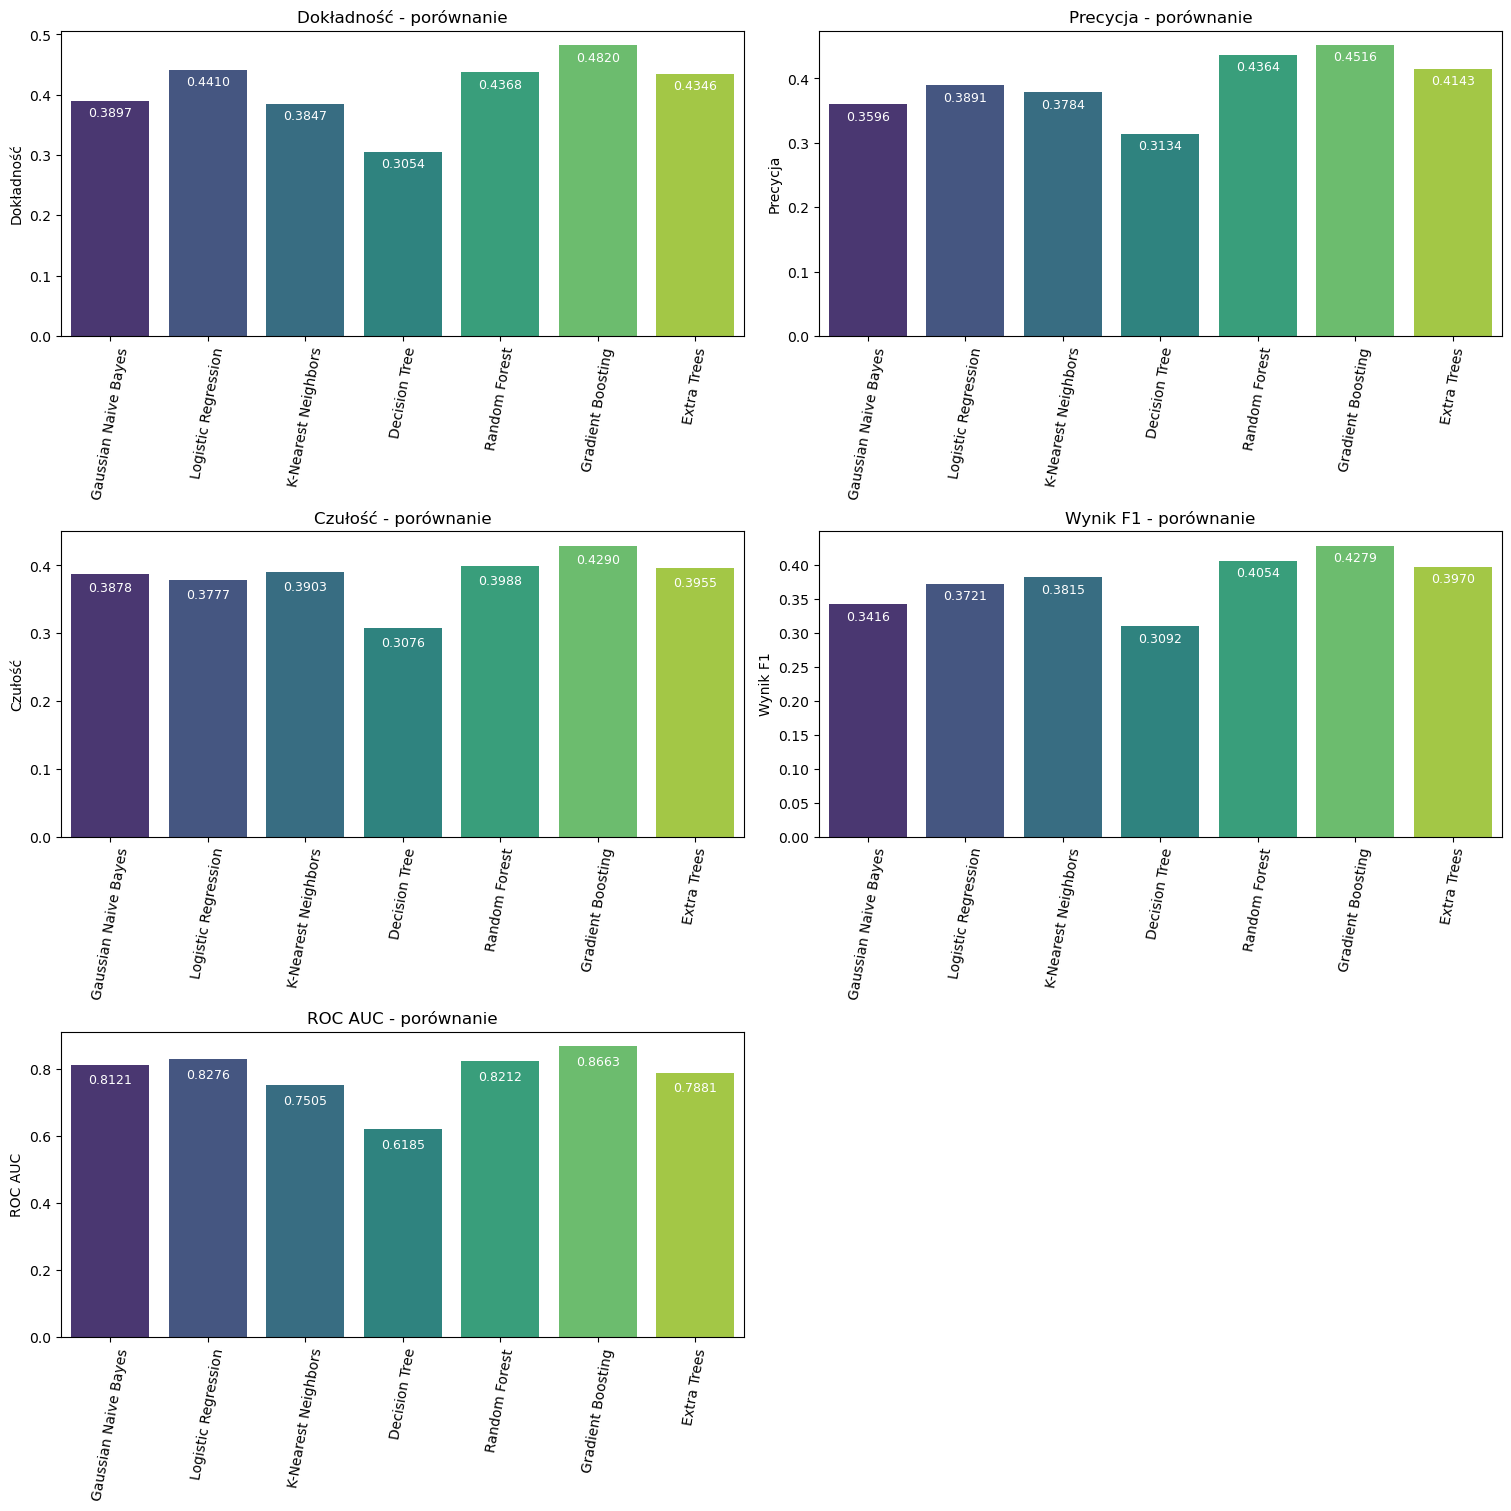

In [107]:
plot_metrics(df_metrics)

Większość metryk najlepiej wypada w przypadku wzmocnienia gradientowego, chociaż pozostałe modele także wypadają bardzo dobrze. Spróbujmy jeszcze poprawić ten model poprzez dostrajanie jego hiperparametrów.

#### Dostrajanie hiperparametrów

Teraz, kiedy dokonaliśmy wyboru jednego modelu, możemy go dostroić poprzez przetestowanie różnych wartości hiperparametrów. Można to zrobić ręcznie, ale było by to bardzo czasochłonne. Na szczęście istnieje odpowiednie rozwiązanie, GridSearchCV.

Nazwa GridSearchCV składa się z dwóch części:
- 'GridSearch' - bo mamy siatkę (grid) z różnymi wartościami hiperparametrów i testujemy każdą możliwą ich kombinację,
- 'CV' (od Cross Validation, walidacja krzyżowa) - bo zbiór danych jest dzielony na wiele ramek i ewaluowane są różne kombinacje treningowo-testowe.

GridSearchCV testuje wszystkie kombinacje hiperparametrów i znajduje najlepszą.

Aby można było użyć GridSearchCV, musimy je zaimportować z scikit-learn:

In [109]:
from sklearn.model_selection import GridSearchCV

Utwórzmy siatkę hiperparametrów dla wybranego modelu:

In [110]:
selected_model = models['Wzmocnienie gradientowe']

hyperparameters = {
    'n_estimators': [50, 100, 200, 300], # number of trees
    'max_depth': [5, 10], # maksymalna głębokość drzew
}

Teraz wytrenujmy GridSearchCV:

In [111]:
grid = GridSearchCV(
    estimator=selected_model, 
    param_grid=hyperparameters, 
    scoring = 'recall_macro',
    cv=5
)

grid.fit(X_train, y_train)

# Pokaż najlepszy wynik i hiperparametry, które go zapewniają
print(f'Najlepszy wynik: {grid.best_score_}')
print()
print('Optymalne wartości hiperparametrów:')
print(grid.best_params_)

Najlepszy wynik: 0.4088048088273891

Optymalne wartości hiperparametrów:
{'max_depth': 5, 'n_estimators': 100}


Teraz, kiedy wiemy już, które hiperparametry są najlepsze, użyjmy ich do trenowania naszego modelu:

In [112]:
tuned_model = GradientBoostingClassifier(**grid.best_params_)

Teraz możemy przeprowadzić trenowanie i ewaluację modelu:

WZMOCNIENIE GRADIENTOWE

METRYKI KLASYFIKACJI

Dokładność: 0.4628
Precycja: 0.4362
Czułość: 0.4119
Wynik F1: 0.4157
ROC AUC: 0.8598

RAPORT Z KLASYFIKACJI

                   precision    recall  f1-score   support

akustyczna/ludowa       0.26      0.22      0.24       126
     alternatywna       0.03      0.01      0.01       262
            blues       0.38      0.38      0.38       243
        bollywood       0.58      0.40      0.48        89
          country       0.29      0.11      0.16        72
           hiphop       0.67      0.68      0.67       293
            indie       0.35      0.27      0.30       513
   instrumentalna       0.72      0.82      0.77       100
            metal       0.59      0.51      0.55       357
              pop       0.49      0.50      0.50       544
             rock       0.44      0.63      0.52       986

         accuracy                           0.46      3585
        macro avg       0.44      0.41      0.42      3585
     weighted av

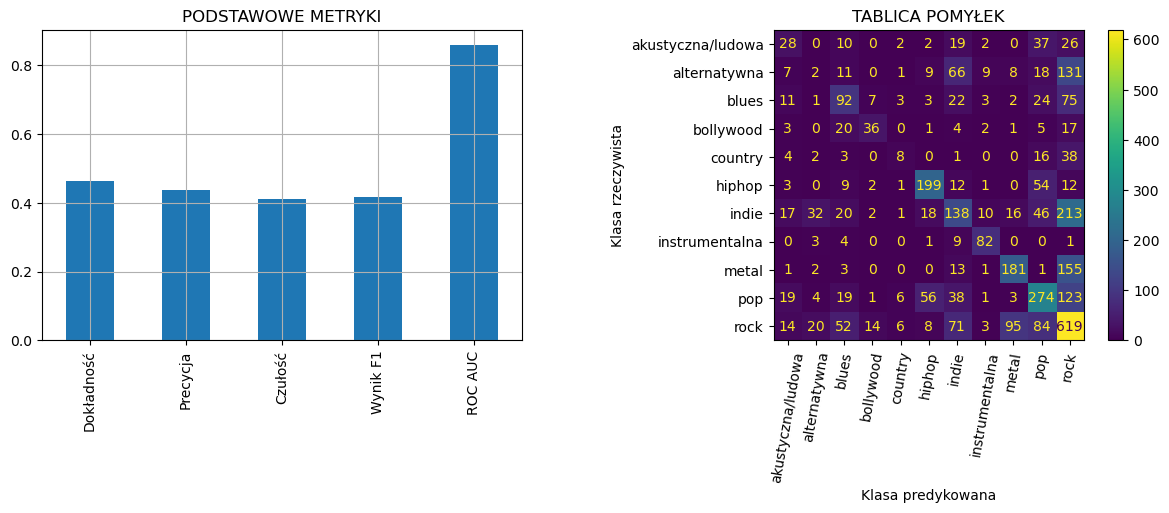

{'Dokładność': 0.46276150627615065,
 'Precycja': 0.4361903508291409,
 'Czułość': 0.41188337998858093,
 'Wynik F1': 0.4157320000875526,
 'ROC AUC': 0.8598499176578746}

In [113]:
train_evaluate_model(tuned_model, 'Wzmocnienie gradientowe')

**Interpretacja:**

Dokładność jest teraz nieco niższa (0.46) niż przed dostrajaniem hiperparametrów (0.48).<br>
Precycja jest teraz nieco niższa (0.43) niż przed dostrajaniem hiperparametrów (0.45).<br>
Czułość jest teraz nieco niższa (0.41) niż przed dostrajaniem hiperparametrów (0.43).<br>
Wynik F1 jest teraz nieco niższy (0.42) niż przed dostrajaniem hiperparametrów (0.43).<br>
ROC AUC jest teraz nieco niższe  (0.86) niż przed dostrajaniem hiperparametrów (0.87).<br>

Jak widać, przy takim doborze hiperparametrów, ich dostrajanie nie poprawiło wyniku. Można próbować różnych innych kombinacji hiperparametrów, aby uzyskać lepszy wynik, zwłaszcza czułości, bo dla naszych danych jest to najważniejsza metryka.

## Wnioski

W zależności od cech naszego zbioru danych, możemy wybrać inne podejście do procesu uczenia maszynowego. Możemy wybrać jeden z modeli tradycyjnych, albo model uczenia głębokiego (deep learning). W naszym przykładzie posłużyliśmy się jedynie modelami tradycyjnymi.

Zanim nie wytrenujemy co najmniej kilku modeli, trudno jest powiedzieć, który model jest optymalny. Czasem modele tradycyjne radzą sobie lepiej, a czasem lepsze wyniki osiągają modele uczenia głębokiego.

Ważne jest także, aby prawidłowo porównywać modele. Znów, w zależności od rodzaju danych, na których pracujemy, musimy zdecydować, które metryki są najważniejsze. 

Trenowanie kilku modeli umożliwia nam porównywanie metryk, na których nam zależy, a następnie poprawianie modelu, w którym mają one najlepsze wartości, na przykład przez dostrajanie hiperparametrów. Ten proces może poprawić jakość modelu, ale nie zawsze się tak dzieje. Czasem, tak jak w tym przypadku, hiperparametry domyślne dają lepsze wyniki. Oczywiście można próbować kombinacji innych hiperparametrów, co może doprowadzić do poprawy wyniku.

Podsumowując, nie ma jednego jedynego słusznego podejścia czy modelu. Zawsze powinniśmy wypróbować co najmniej kilka modeli i porównać wyniki. Ostatecznie powinniśmy wybrać model, który radzi sobie najlepiej i używać go do pracy na danych tego samego rodzaju. Musimy jednak pamiętać, że nie musi to być wcale optymalny model dla innych typów danych.